# Project 3 OpenClassroom
Analysis of Nutriscore provided by Open Food Facts 
https://www.openfoodfacts.org



### Import of the required modules

In [1]:
## To display the graphs within the code and not in another windows 
import sys
print("Python Version :"+str(sys.version_info))
%matplotlib inline
#To be able to use CSV
import csv
print("CSV Version :"+csv.__version__)
# To be able to use Numpy
import numpy as np
print("Numpy Version :"+np.__version__)
# To be able to use Pandas
import pandas as pd
print("Pandas Version :"+pd.__version__)
# To be able to use Maplotlib
import matplotlib.pyplot as plt

# To be able to use Seaborn
import seaborn as sns
print("Seaborn Version :"+sns.__version__)

# To be able to use WorldCloud
from wordcloud import WordCloud, STOPWORDS 

# To be able to use Warning
import warnings

Python Version :sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
CSV Version :1.0
Numpy Version :1.17.2
Pandas Version :0.25.1
Seaborn Version :0.9.0


### Init of the main variables

In [2]:
chunksize=10000
number_of_lines=0
number_of_columns=0
size_of_the_dataset=0

OFFDataChunkWithSelectedColumns=pd.DataFrame()
number_of_nan_by_column=pd.Series()
number_of_nan_by_row=pd.Series()

selected_columns=['code', 'product_name','categories','categories_en','countries_en','nutriscore_score','nutriscore_grade','energy-kj_100g','energy-kcal_100g','saturated-fat_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g','fruits-vegetables-nuts_100g','allergens_en','traces_en','additives_en','ingredients_from_palm_oil_n','ingredients_from_palm_oil','ingredients_that_may_be_from_palm_oil_n','ingredients_that_may_be_from_palm_oil','alcohol_100g']
data_columns=selected_columns[5:len(selected_columns)]
#columns_below_100=['saturated-fat_100g','sugars_100g','fiber_100g','proteins_100g','fruits-vegetables-nuts_100g','fruits-vegetables-nuts-dried_100g','fruits-vegetables-nuts-estimate_100g']
columns_below_100=['saturated-fat_100g','sugars_100g','fiber_100g','proteins_100g','fruits-vegetables-nuts_100g','alcohol_100g']


#Disable the warnings "ignore"
warnings.filterwarnings("ignore")

### Reading of the file
Previously, the file is downloaded from the Open Food Facts and stored locally.

As the file size is big, it is splitted in small parts. (Chunk)
In order to be able to do some statistics related to data quality, the number of Nan by column and by row are computed in only selecting the year columns.

In [3]:
# The data file is too big so it is opened in small parts
for OFFDataChunk in pd.read_csv('./en.openfoodfacts.org.products.csv', sep='\t', header=0, chunksize=chunksize):
    #as the file is splitted in several parts, it is required to have some counters for the line number and the column number
    number_of_lines= number_of_lines + OFFDataChunk.shape[0]
    number_of_columns=OFFDataChunk.shape[1]
    size_of_the_dataset= size_of_the_dataset+ OFFDataChunk.size
    #print("Shape "+str(EdStatsDataChunk.shape) + " Size "+ str(EdStatsDataChunk.size))
    #number_of_nan_by_column#=number_of_nan_by_column.add(OFFDataChunk.iloc[:,:].isnull().sum(), fill_value=0)
    #number_of_nan_by_row=number_of_nan_by_row.add(OFFDataChunk.iloc[:,:].isnull().sum(axis=1), fill_value=0)
    OFFDataChunkWithSelectedColumns=pd.concat([OFFDataChunkWithSelectedColumns,OFFDataChunk[selected_columns]],axis=0,join='outer')
    #OFFDataChunkWithSelectedColumns=OFFDataChunkWithSelectedColumns[selected_columns]

### Display some rows of the original dataset

In [4]:
pd.set_option('display.max_columns', 200)
OFFDataChunk.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
1090000,9310232100500,http://world-en.openfoodfacts.org/product/9310...,openfoodfacts-contributors,1556425403,2019-04-28T04:23:23Z,1565969538,2019-08-16T15:32:18Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Woolworths,en:Australia,en:australia,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Display of some statistics on the original dataset
###### Print the number of lines and the number of columns

In [5]:
#Display of some statistics on the original dataset
print("Number of Lines "+str(number_of_lines)+" "+ "\nNumber of Columns "+ str(number_of_columns))


Number of Lines 1096564 
Number of Columns 178


The number of lines is huge.

###### Print the columns name

In [6]:
print("Columns name " + OFFDataChunk.columns.values)

['Columns name code' 'Columns name url' 'Columns name creator'
 'Columns name created_t' 'Columns name created_datetime'
 'Columns name last_modified_t' 'Columns name last_modified_datetime'
 'Columns name product_name' 'Columns name generic_name'
 'Columns name quantity' 'Columns name packaging'
 'Columns name packaging_tags' 'Columns name brands'
 'Columns name brands_tags' 'Columns name categories'
 'Columns name categories_tags' 'Columns name categories_en'
 'Columns name origins' 'Columns name origins_tags'
 'Columns name manufacturing_places'
 'Columns name manufacturing_places_tags' 'Columns name labels'
 'Columns name labels_tags' 'Columns name labels_en'
 'Columns name emb_codes' 'Columns name emb_codes_tags'
 'Columns name first_packaging_code_geo' 'Columns name cities'
 'Columns name cities_tags' 'Columns name purchase_places'
 'Columns name stores' 'Columns name countries'
 'Columns name countries_tags' 'Columns name countries_en'
 'Columns name ingredients_text' 'Columns n

###### Print the original size of the dataset

In [7]:
print("Size of the original dataset "+str(size_of_the_dataset))

Size of the original dataset 195188392


###### Print the different data types 

In [8]:
print("Types ")
OFFDataChunk.dtypes

Types 


code                   object
url                    object
creator                object
created_t               int64
created_datetime       object
                       ...   
choline_100g          float64
phylloquinone_100g    float64
beta-glucan_100g      float64
inositol_100g         float64
carnitine_100g        float64
Length: 178, dtype: object

###### delete the dataframe for memory purpose

In [9]:
del OFFDataChunk

In [10]:
pd.set_option('display.max_columns', 40)
OFFDataChunkWithSelectedColumns.head(100)

,code,product_name,categories,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,allergens_en,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,alcohol_100g
0,0000000000017,Vitória crackers,NaN,NaN,France,NaN,NaN,NaN,1569.0,3.08,15.00,NaN,7.8,1.400,0.560000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,Cacao,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,Filetes de pollo empanado,NaN,NaN,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,moutarde au moût de raisin,"Epicerie,Condiments,Sauces,Moutardes","Groceries,Condiments,Sauces,Mustards",France,18.0,d,936.0,NaN,2.20,22.00,0.0,5.1,4.600,1.811024,NaN,NaN,NaN,E160c - Paprika extract,0.0,NaN,0.0,NaN,NaN
4,00000000001111111111,Sfiudwx,fr:Xsf,fr:xsf,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0000000015509,Baguette Niçois,NaN,NaN,France,NaN,NaN,NaN,812.0,0.80,1.60,NaN,9.6,1.100,0.440000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,0000000015707,8 Buchettes poulet cœur aux figues,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,0000000015721,Baguette Gruyère &quot;Petit Prix&quot;,NaN,NaN,France,NaN,NaN,NaN,1201.0,5.60,1.90,NaN,12.3,1.500,0.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,000000001576,Pur jus de pomme,NaN,NaN,France,NaN,NaN,NaN,925.0,0.10,0.01,NaN,0.5,0.010,0.004000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
OFFDataChunkWithSelectedColumns.tail(100)

,code,product_name,categories,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,allergens_en,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,alcohol_100g
1096464,99746513,Bio mozzarella,NaN,NaN,France,NaN,NaN,NaN,1029.0,12.3,1.0,NaN,18.9,0.60,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096465,99751013590360,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096466,99751021310345,pain batard cereales,Pains,"Plant-based foods and beverages,Plant-based fo...",France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096467,9975129163060,Casque a vendre,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096468,997523335113,NaN,NaN,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096559,9999999004360,Minis beignets,Beignets sucrés,"Snacks,Sweet snacks,Sweet Fritters",France,15.0,d,NaN,1393.0,6.0,10.4,NaN,7.4,1.10,0.440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096560,9999999175305,Erdbeerkuchen 1019g tiefgefroren,"tiefkühl-Kuchen,Kuchen","Biscuits and cakes,Cakes,de:tiefkühl-kuchen",Germany,12.0,d,925.0,NaN,4.8,24.0,NaN,2.6,0.28,0.112,NaN,NaN,NaN,"E160a - Alpha-carotene,E400 - Alginic acid,E44...",0.0,NaN,0.0,NaN,NaN
1096561,99999995,Steak haché pur boeuf,"Viandes, Bœuf, Steaks, Steaks de bœuf, Steaks ...","Meats,Beef,Steaks,Beef steaks,Ground steaks,Gr...",France,-2.0,a,NaN,548.0,2.3,0.0,NaN,21.5,0.18,0.072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096562,9999999900686,Marrons glacés,NaN,NaN,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Display of some statistics on the original dataset
###### Print the number of lines and the number of columns

In [12]:
number_of_lines=OFFDataChunkWithSelectedColumns.shape[0]
number_of_columns=OFFDataChunkWithSelectedColumns.shape[1]

print("Number of Lines "+str(number_of_lines)+" "+ "\nNumber of Columns "+ str(number_of_columns))


Number of Lines 1096564 
Number of Columns 24


###### Print the size of the dataset

In [13]:
size_of_the_dataset= OFFDataChunkWithSelectedColumns.size
print("Size of the dataset "+str(size_of_the_dataset))

Size of the dataset 26317536


### Show the duplicated lines

In [14]:
duplicatedRowsDF = OFFDataChunkWithSelectedColumns[OFFDataChunkWithSelectedColumns.duplicated(subset=data_columns,keep=False)]
#test=duplicatedRowsDF.groupby(by=data_columns,as_index=False)[data_columns]
test=duplicatedRowsDF.sort_values(by=data_columns)
test.head(100)

,code,product_name,categories,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,allergens_en,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,alcohol_100g
1096284,9900162792162001950001,Rindswurst 4 Grill,Würste,"Meats,Prepared meats,Sausages","France,Germany",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096286,9900306100002,VIDAL Isabelle & Bernard,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096289,99005000,Noix de coco cubes,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096290,9900560000001,Fromage fermier bio au lait cru,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096291,9900762148914,Foie gras,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096546,9999990060518,Cailloux aromes fruits,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096549,9999990060563,Cailloux Coeur Chocolat,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096557,99999971,test,Tests,fr:tests,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096562,9999999900686,Marrons glacés,NaN,NaN,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop the duplicated lines

In [15]:

OFFDataChunkWithSelectedColumns.drop_duplicates(subset=data_columns,keep='first',inplace=True)
number_of_lines=OFFDataChunkWithSelectedColumns.shape[0]
number_of_columns=OFFDataChunkWithSelectedColumns.shape[1]

print("Number of Lines "+str(number_of_lines)+" "+ "\nNumber of Columns "+ str(number_of_columns))
size_of_the_dataset= OFFDataChunkWithSelectedColumns.size
print("Size of the dataset "+str(size_of_the_dataset))

Number of Lines 699894 
Number of Columns 24
Size of the dataset 16797456


###### Print the number of Nan by column for the columns with numerical data

Description of Nan in each column for the selected years dataset 
 count        19.000000
mean     389195.315789
std      275460.352094
min       11538.000000
25%       55188.500000
50%      434605.000000
75%      655089.500000
max      699894.000000
dtype: float64


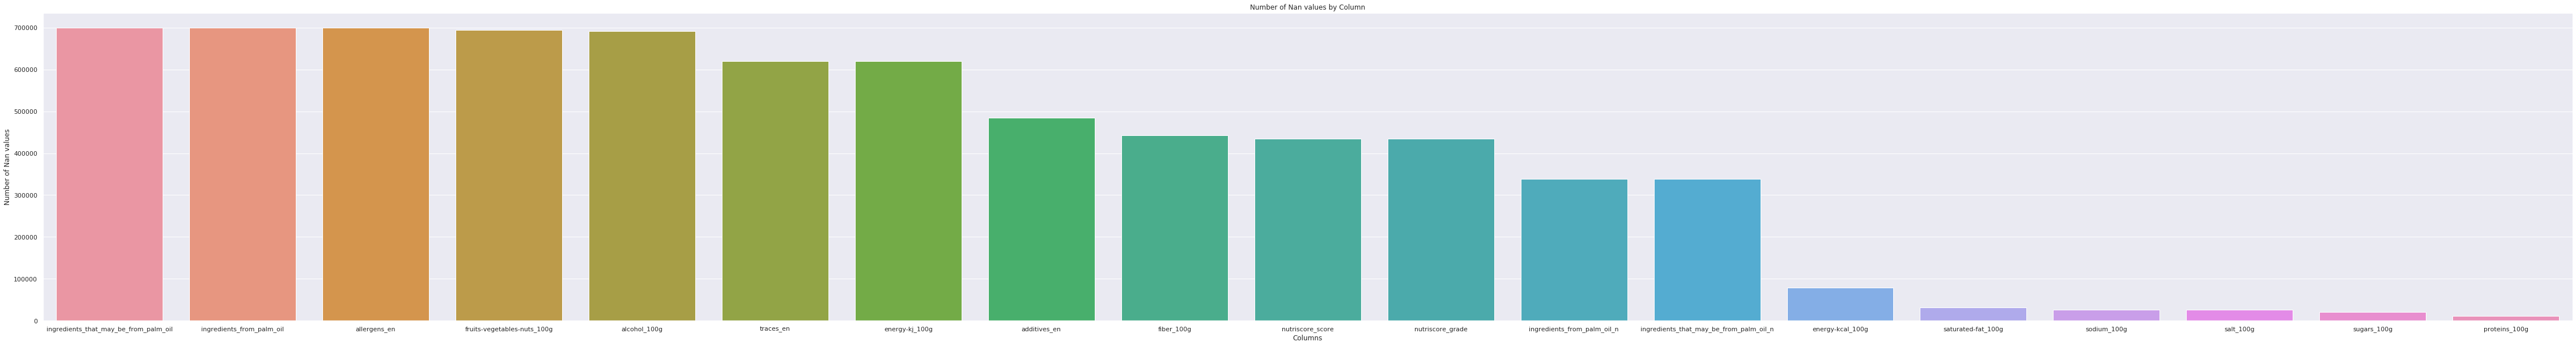

In [16]:
number_of_nan_by_column_selected_data=OFFDataChunkWithSelectedColumns.loc[:,data_columns].isnull().sum()
print("Description of Nan in each column for the selected years dataset \n "+str(number_of_nan_by_column_selected_data.describe()))


data_columns_series=pd.Series(data_columns,index=data_columns)
number_of_nan_by_column_df=pd.DataFrame({ 'Columns':data_columns_series,'Nan': number_of_nan_by_column_selected_data },index=data_columns_series)
number_of_nan_by_column_df=number_of_nan_by_column_df.sort_values(by=['Nan'], ascending=False).reset_index()
sns.set(color_codes=True)
plt.figure(figsize=(80,10))
ax=sns.barplot(x='Columns',y='Nan', data=number_of_nan_by_column_df)
ax.set_title('Number of Nan values by Column')
ax.set_xlabel('Columns')
ax.set_ylabel('Number of Nan values')
ax.figure.savefig("./numberofnanbycolumn.png")

plt.show()

###### Display the number of Nan by columns

In [17]:
number_of_nan_by_column_df


,index,Columns,Nan
0,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil,699894
1,ingredients_from_palm_oil,ingredients_from_palm_oil,699894
2,allergens_en,allergens_en,699894
3,fruits-vegetables-nuts_100g,fruits-vegetables-nuts_100g,694265
4,alcohol_100g,alcohol_100g,690880
5,traces_en,traces_en,619299
6,energy-kj_100g,energy-kj_100g,619073
7,additives_en,additives_en,485104
8,fiber_100g,fiber_100g,442440
9,nutriscore_score,nutriscore_score,434605


We noticed that the following ingredients have no value: ingredients_that_may_be_from_palm_oil, ingredients_from_oil, allergens_en so we remove them for the dataset.

###### Print the number of Nan by row for the columns with numerical data

Description of Nan in each row 
 count    699894.000000
mean         10.565473
std           2.458846
min           3.000000
25%           9.000000
50%          11.000000
75%          13.000000
max          19.000000
dtype: float64


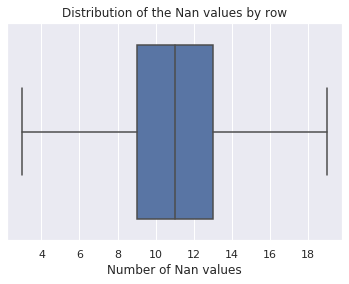

In [18]:
number_of_nan_by_row_selected_data=OFFDataChunkWithSelectedColumns.loc[:,data_columns].isnull().sum(axis=1)

print("Description of Nan in each row \n "+str(number_of_nan_by_row_selected_data.describe()))
number_of_nan_by_row_selected_data_df=pd.DataFrame({ 'Nan': number_of_nan_by_row_selected_data } )

bx=sns.boxplot(x='Nan', data=number_of_nan_by_row_selected_data_df)
bx.set_title('Distribution of the Nan values by row')
bx.set_xlabel('Number of Nan values')
bx.figure.savefig("./numberofnanbyrow.png")
plt.show()

###### Display the number of values per year

Number of values in each column for the selected data 
 count        19.000000
mean     310698.684211
std      275460.352094
min           0.000000
25%       44804.500000
50%      265289.000000
75%      644705.500000
max      688356.000000
dtype: float64


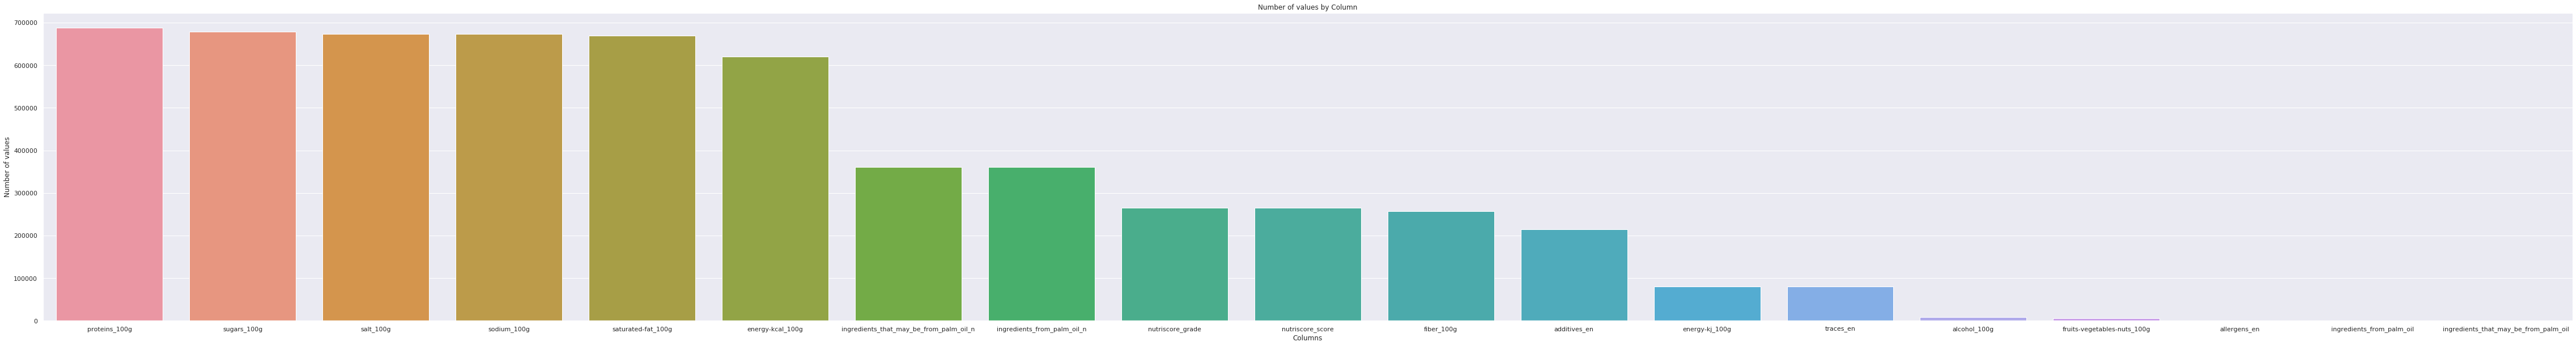

In [19]:
number_of_nan_by_column_selected_data=OFFDataChunkWithSelectedColumns.loc[:,data_columns].count()
print("Number of values in each column for the selected data \n "+str(number_of_nan_by_column_selected_data.describe()))

data_columns_series=pd.Series(data_columns,index=data_columns)
number_of_nan_by_column_df=pd.DataFrame({ 'Columns':data_columns_series,'Nan': number_of_nan_by_column_selected_data },index=data_columns_series)
number_of_nan_by_column_df=number_of_nan_by_column_df.sort_values(by=['Nan'], ascending=False).reset_index()
sns.set(color_codes=True)
plt.figure(figsize=(80,10))
ax=sns.barplot(x='Columns',y='Nan', data=number_of_nan_by_column_df)
ax.set_title('Number of values by Column')
ax.set_xlabel('Columns')
ax.set_ylabel('Number of values')
ax.figure.savefig("./numberofvaluesbycolumn.png")

plt.show()

In [20]:
selected_columns.remove('ingredients_that_may_be_from_palm_oil')
selected_columns.remove('ingredients_from_palm_oil')
selected_columns.remove('allergens_en')

data_columns.remove('ingredients_that_may_be_from_palm_oil')
data_columns.remove('ingredients_from_palm_oil')
data_columns.remove('allergens_en')
OFFDataChunkWithSelectedColumns=OFFDataChunkWithSelectedColumns[selected_columns]

###### Display some graphs to have an overview on data

In [21]:
#sns.set(style="ticks", color_codes=True)
#gx = sns.pairplot(OFFDataChunkWithSelectedColumns[data_columns])
#gx.savefig("./analysis.png")
#plt.show()

### Analysis of the outliers for Saturated Fats, Sugar, Fiber and Proteins

###### Analysis of the outliers for Saturated Fats

count    668709.000000
mean          5.218431
std          30.785034
min           0.000000
25%           0.200000
50%           2.000000
75%           7.200000
max       18000.000000
Name: saturated-fat_100g, dtype: float64


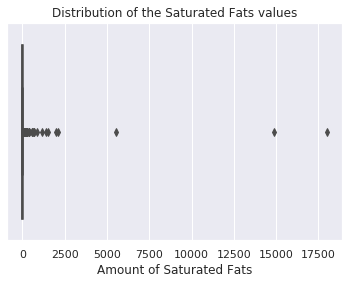

In [22]:
print(OFFDataChunkWithSelectedColumns['saturated-fat_100g'].describe())
ax = sns.boxplot(OFFDataChunkWithSelectedColumns['saturated-fat_100g'])
ax.set_title('Distribution of the Saturated Fats values')
ax.set_xlabel('Amount of Saturated Fats')
ax.get_figure().savefig('outliers_saturatedfats.png')
plt.show()


###### Analysis of the outliers for Sugar

count    678804.000000
mean         14.579433
std          28.065864
min         -17.860000
25%           1.000000
50%           4.550000
75%          21.900000
max        9100.000000
Name: sugars_100g, dtype: float64


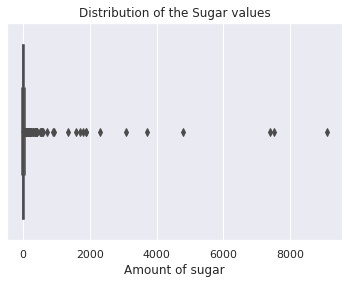

Quantile 0,25 1.0
Quantile 0,75 21.9


In [23]:
# ax = sns.(OFFDataChunkWithSelectedColumns['sugars_100g'])
#plt.show()
print(OFFDataChunkWithSelectedColumns['sugars_100g'].describe())
ax = sns.boxplot(OFFDataChunkWithSelectedColumns['sugars_100g'])
ax.set_title('Distribution of the Sugar values')
ax.set_xlabel('Amount of sugar')
ax.get_figure().savefig('outliers_sugars.png')
plt.show()

print("Quantile 0,25 "+str(OFFDataChunkWithSelectedColumns['sugars_100g'].quantile(0.25)))
print("Quantile 0,75 "+str(OFFDataChunkWithSelectedColumns['sugars_100g'].quantile(0.75)))


###### Analysis of the outliers for Fiber

count    257454.000000
mean          3.114627
std           7.696468
min         -20.000000
25%           0.000000
50%           1.600000
75%           3.600000
max         900.000000
Name: fiber_100g, dtype: float64


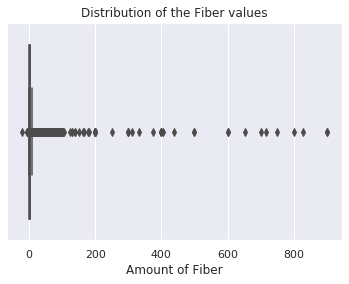

In [24]:
print(OFFDataChunkWithSelectedColumns['fiber_100g'].describe())
ax = sns.boxplot(OFFDataChunkWithSelectedColumns['fiber_100g'])
ax.set_title('Distribution of the Fiber values')
ax.set_xlabel('Amount of Fiber')
ax.get_figure().savefig('outliers_fibers.png')
plt.show()

###### Analysis of the outliers for Proteins

count    688356.000000
mean          8.427252
std          53.393340
min        -800.000000
25%           1.600000
50%           5.900000
75%          11.110000
max       31000.000000
Name: proteins_100g, dtype: float64


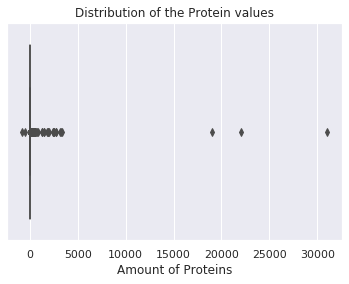

In [25]:
print(OFFDataChunkWithSelectedColumns['proteins_100g'].describe())
ax = sns.boxplot(OFFDataChunkWithSelectedColumns['proteins_100g'])
ax.set_title('Distribution of the Protein values')
ax.set_xlabel('Amount of Proteins')
ax.get_figure().savefig('proteins.png')
plt.show()

###### Analysis of the outliers for Fruits Vegetables Nuts

count    5629.000000
mean       41.775161
std        35.512243
min         0.000000
25%         9.000000
50%        35.900000
75%        69.000000
max       100.000000
Name: fruits-vegetables-nuts_100g, dtype: float64


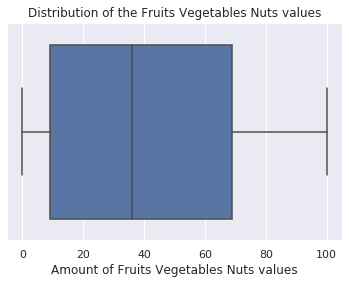

In [26]:
print(OFFDataChunkWithSelectedColumns['fruits-vegetables-nuts_100g'].describe())
ax = sns.boxplot(OFFDataChunkWithSelectedColumns['fruits-vegetables-nuts_100g'])
ax.set_title('Distribution of the Fruits Vegetables Nuts values')
ax.set_xlabel('Amount of Fruits Vegetables Nuts values')
ax.get_figure().savefig('outliers_fruits.png')
plt.show()

###### Analysis of the outliers for Alcohol

count    9014.000000
mean        2.088751
std         8.680307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: alcohol_100g, dtype: float64


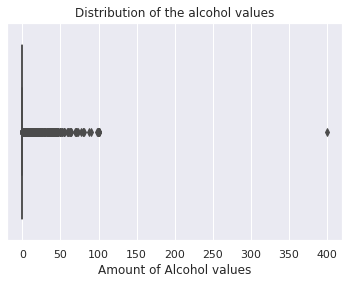

In [27]:
print(OFFDataChunkWithSelectedColumns['alcohol_100g'].describe())
ax = sns.boxplot(OFFDataChunkWithSelectedColumns['alcohol_100g'])
ax.set_title('Distribution of the alcohol values')
ax.set_xlabel('Amount of Alcohol values')
ax.get_figure().savefig('outliers_alcohol.png')
plt.show()

###### Display the relevant data for the dataset

In [28]:
OFFDataChunkWithSelectedColumns[data_columns]

,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,alcohol_100g
0,NaN,NaN,NaN,1569.0,3.08,15.0,NaN,7.8,1.40,0.560000,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18.0,d,936.0,NaN,2.20,22.0,0.0,5.1,4.60,1.811024,NaN,NaN,E160c - Paprika extract,0.0,0.0,NaN
5,NaN,NaN,NaN,88.0,0.00,0.4,NaN,0.2,2.04,0.816000,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,251.0,1.00,3.0,NaN,2.0,1.15,0.460000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096550,NaN,NaN,NaN,1979.0,15.00,63.0,NaN,9.0,0.00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1096552,7.0,c,NaN,628.0,4.30,14.0,NaN,2.9,0.08,0.032000,NaN,NaN,NaN,NaN,NaN,NaN
1096555,0.0,b,NaN,1469.0,0.00,0.0,NaN,7.0,0.00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1096559,15.0,d,NaN,1393.0,6.00,10.4,NaN,7.4,1.10,0.440000,NaN,NaN,NaN,NaN,NaN,NaN


### Replace Nan values by 0 for quantities that have to be below than 100g

In [29]:
#tests = OFFDataChunkWithSelectedColumns[OFFDataChunkWithSelectedColumns[columns_below_100].fillna(0)]
#OFFDataChunkWithSelectedColumns['fiber_100g'].fillna(value=0, inplace=True)
for i in columns_below_100:
    OFFDataChunkWithSelectedColumns[i].fillna(value=0, inplace=True)
    OFFDataChunkWithSelectedColumns=OFFDataChunkWithSelectedColumns[OFFDataChunkWithSelectedColumns[i].between(0,100,inclusive=True)]


###### Convert kcal to kj when kj is not filled in

In [30]:
Empty_Energy_Kj_df=OFFDataChunkWithSelectedColumns[OFFDataChunkWithSelectedColumns['energy-kj_100g'].isna() & ~OFFDataChunkWithSelectedColumns['energy-kcal_100g'].isna()]
Empty_Energy_Kj_df['energy-kj_100g']=Empty_Energy_Kj_df['energy-kcal_100g']/4.184
OFFDataChunkWithSelectedColumns['energy-kj_100g']=Empty_Energy_Kj_df['energy-kj_100g']

###### Display the dataset

In [31]:
OFFDataChunkWithSelectedColumns

,code,product_name,categories,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,alcohol_100g
0,0000000000017,Vitória crackers,NaN,NaN,France,NaN,NaN,375.000000,1569.0,3.08,15.0,0.0,7.8,1.40,0.560000,0.0,NaN,NaN,NaN,NaN,0.0
1,0000000000031,Cacao,NaN,NaN,France,NaN,NaN,NaN,NaN,0.00,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
3,0000000000100,moutarde au moût de raisin,"Epicerie,Condiments,Sauces,Moutardes","Groceries,Condiments,Sauces,Mustards",France,18.0,d,NaN,NaN,2.20,22.0,0.0,5.1,4.60,1.811024,0.0,NaN,E160c - Paprika extract,0.0,0.0,0.0
5,0000000000123,Sauce Sweety chili 0%,NaN,NaN,France,NaN,NaN,21.032505,88.0,0.00,0.4,0.0,0.2,2.04,0.816000,0.0,NaN,NaN,NaN,NaN,0.0
6,0000000000178,Mini coco,NaN,NaN,France,NaN,NaN,59.990440,251.0,1.00,3.0,0.0,2.0,1.15,0.460000,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096550,9999990060631,Cailloux aux amandes,NaN,NaN,France,NaN,NaN,472.992352,1979.0,15.00,63.0,0.0,9.0,0.00,0.000000,0.0,NaN,NaN,NaN,NaN,0.0
1096552,9999991042711,Riz au lait,fr:Riz au lait,"Desserts,Puddings,Rice puddings",France,7.0,c,150.095602,628.0,4.30,14.0,0.0,2.9,0.08,0.032000,0.0,NaN,NaN,NaN,NaN,0.0
1096555,9999991149090,Riz parfumé,"Aliments et boissons à base de végétaux, Alime...","Plant-based foods and beverages,Plant-based fo...",France,0.0,b,351.099426,1469.0,0.00,0.0,0.0,7.0,0.00,0.000000,0.0,NaN,NaN,NaN,NaN,0.0
1096559,9999999004360,Minis beignets,Beignets sucrés,"Snacks,Sweet snacks,Sweet Fritters",France,15.0,d,332.934990,1393.0,6.00,10.4,0.0,7.4,1.10,0.440000,0.0,NaN,NaN,NaN,NaN,0.0


### Drop the rows that have the most of Nan values (the 4th quartile) 

In [32]:
number_of_nan_by_row_selected_data=OFFDataChunkWithSelectedColumns.loc[:,data_columns].isnull().sum(axis=1)
number_of_nan_by_row_selected_data.quantile(0.75)
OFFDataChunkWithSelectedColumns.dropna(thresh=number_of_nan_by_row_selected_data.quantile(0.75),subset=data_columns,inplace=True)

In [33]:
OFFDataChunkWithSelectedColumns

,code,product_name,categories,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,alcohol_100g
0,0000000000017,Vitória crackers,NaN,NaN,France,NaN,NaN,375.000000,1569.0,3.08,15.0,0.0,7.8,1.40,0.560000,0.0,NaN,NaN,NaN,NaN,0.0
1,0000000000031,Cacao,NaN,NaN,France,NaN,NaN,NaN,NaN,0.00,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
3,0000000000100,moutarde au moût de raisin,"Epicerie,Condiments,Sauces,Moutardes","Groceries,Condiments,Sauces,Mustards",France,18.0,d,NaN,NaN,2.20,22.0,0.0,5.1,4.60,1.811024,0.0,NaN,E160c - Paprika extract,0.0,0.0,0.0
5,0000000000123,Sauce Sweety chili 0%,NaN,NaN,France,NaN,NaN,21.032505,88.0,0.00,0.4,0.0,0.2,2.04,0.816000,0.0,NaN,NaN,NaN,NaN,0.0
6,0000000000178,Mini coco,NaN,NaN,France,NaN,NaN,59.990440,251.0,1.00,3.0,0.0,2.0,1.15,0.460000,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096550,9999990060631,Cailloux aux amandes,NaN,NaN,France,NaN,NaN,472.992352,1979.0,15.00,63.0,0.0,9.0,0.00,0.000000,0.0,NaN,NaN,NaN,NaN,0.0
1096552,9999991042711,Riz au lait,fr:Riz au lait,"Desserts,Puddings,Rice puddings",France,7.0,c,150.095602,628.0,4.30,14.0,0.0,2.9,0.08,0.032000,0.0,NaN,NaN,NaN,NaN,0.0
1096555,9999991149090,Riz parfumé,"Aliments et boissons à base de végétaux, Alime...","Plant-based foods and beverages,Plant-based fo...",France,0.0,b,351.099426,1469.0,0.00,0.0,0.0,7.0,0.00,0.000000,0.0,NaN,NaN,NaN,NaN,0.0
1096559,9999999004360,Minis beignets,Beignets sucrés,"Snacks,Sweet snacks,Sweet Fritters",France,15.0,d,332.934990,1393.0,6.00,10.4,0.0,7.4,1.10,0.440000,0.0,NaN,NaN,NaN,NaN,0.0


###### Count the rows by country

In [34]:
countries_df=OFFDataChunkWithSelectedColumns.groupby('countries_en').size().reset_index(name='counts')

###### Display the number of rows by country

In [35]:
countries_df.sort_values(by='counts',axis=0,ascending=False)

,countries_en,counts
1075,France,376643
1890,United States,121123
1849,Spain,58324
1862,Switzerland,18670
354,Belgium,17794
...,...,...
733,"Burkina Faso,Côte d'Ivoire,France",1
731,"Bulgaria,Ukraine",1
730,"Bulgaria,Turkey",1
728,"Bulgaria,Romania,Ukraine",1


We noticed that sometimes there are several country names in the countries_en column, the total is limited, we decide to remove them.

In [36]:
countries_df=countries_df[~countries_df['countries_en'].str.contains(',', na=False)]

In [37]:
countries_df.sort_values(by='counts',axis=0,ascending=False).head(50)

,countries_en,counts
1075,France,376643
1890,United States,121123
1849,Spain,58324
1862,Switzerland,18670
354,Belgium,17794
1502,Germany,14759
1887,United Kingdom,7758
1711,Mexico,3571
1632,Italy,3058
746,Canada,2800


######  Replace the term fr: by France

In [38]:
#countries_df['countries_en'].loc[(countries_df['countries_en'].str.contains('fr:',na=False))] = 'France'
#countries_df[['countries_en']]=countries_df[['countries_en']].replace(to_replace=r'^*fr:.*$', value='France', regex=True)
#countries_df.replace({'countries_en': r'^*fr:.*$'}, {'countries_en': 'France'}, regex=True)
countries_df[['countries_en']]=countries_df[['countries_en']].replace(to_replace=r'^.*fr:.*$',value='France',regex=True)

In [39]:
countries_df

,countries_en,counts
1,Albania,13
14,Algeria,349
50,Andorra,124
55,Angola,3
58,Argentina,288
...,...,...
1902,Yemen,4
1903,Yugoslavia,2
1904,Zimbabwe,1
1905,France,3


In [40]:
countries_df.sort_values(by='counts',axis=0,ascending=False).head(50)

,countries_en,counts
1075,France,376643
1890,United States,121123
1849,Spain,58324
1862,Switzerland,18670
354,Belgium,17794
1502,Germany,14759
1887,United Kingdom,7758
1711,Mexico,3571
1632,Italy,3058
746,Canada,2800


###### Display a graph for the five countries that have the most of data

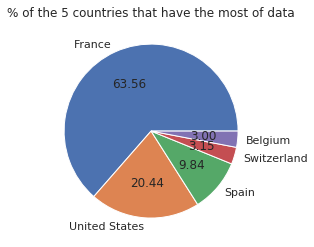

In [41]:
selected_countries_df=countries_df.sort_values(by='counts',axis=0,ascending=False).head(5)

sizes = selected_countries_df['counts'].values.tolist()
labels = selected_countries_df['countries_en'].values.tolist()

plt.pie(sizes, labels = labels, autopct = "%.2f")
plt.axes().set_aspect("equal")
plt.title('% of the 5 countries that have the most of data')
plt.show()

###### The data cleaning is perfomed on the dataset

In [42]:
OFFDataChunkWithSelectedColumns=OFFDataChunkWithSelectedColumns[~OFFDataChunkWithSelectedColumns['countries_en'].str.contains(',', na=False)]
OFFDataChunkWithSelectedColumns[['countries_en']]=OFFDataChunkWithSelectedColumns[['countries_en']].replace(to_replace=r'^.*fr:.*$',value='France',regex=True)


In [43]:
OFFDataChunkWithSelectedColumns=OFFDataChunkWithSelectedColumns.loc[OFFDataChunkWithSelectedColumns['countries_en']=='France']
OFFDataChunkWithSelectedColumns

,code,product_name,categories,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,alcohol_100g
0,0000000000017,Vitória crackers,NaN,NaN,France,NaN,NaN,375.000000,1569.0,3.08,15.0,0.0,7.8,1.40,0.560000,0.0,NaN,NaN,NaN,NaN,0.0
1,0000000000031,Cacao,NaN,NaN,France,NaN,NaN,NaN,NaN,0.00,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
3,0000000000100,moutarde au moût de raisin,"Epicerie,Condiments,Sauces,Moutardes","Groceries,Condiments,Sauces,Mustards",France,18.0,d,NaN,NaN,2.20,22.0,0.0,5.1,4.60,1.811024,0.0,NaN,E160c - Paprika extract,0.0,0.0,0.0
5,0000000000123,Sauce Sweety chili 0%,NaN,NaN,France,NaN,NaN,21.032505,88.0,0.00,0.4,0.0,0.2,2.04,0.816000,0.0,NaN,NaN,NaN,NaN,0.0
6,0000000000178,Mini coco,NaN,NaN,France,NaN,NaN,59.990440,251.0,1.00,3.0,0.0,2.0,1.15,0.460000,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096548,9999990060556,Cailloux coeur chocolat,NaN,NaN,France,NaN,NaN,403.919694,1690.0,0.00,93.0,0.0,0.0,0.00,0.000000,0.0,NaN,NaN,NaN,NaN,0.0
1096550,9999990060631,Cailloux aux amandes,NaN,NaN,France,NaN,NaN,472.992352,1979.0,15.00,63.0,0.0,9.0,0.00,0.000000,0.0,NaN,NaN,NaN,NaN,0.0
1096552,9999991042711,Riz au lait,fr:Riz au lait,"Desserts,Puddings,Rice puddings",France,7.0,c,150.095602,628.0,4.30,14.0,0.0,2.9,0.08,0.032000,0.0,NaN,NaN,NaN,NaN,0.0
1096555,9999991149090,Riz parfumé,"Aliments et boissons à base de végétaux, Alime...","Plant-based foods and beverages,Plant-based fo...",France,0.0,b,351.099426,1469.0,0.00,0.0,0.0,7.0,0.00,0.000000,0.0,NaN,NaN,NaN,NaN,0.0


In [44]:
categories_df=OFFDataChunkWithSelectedColumns.groupby('categories_en').size().reset_index(name='counts')
categories_df.sort_values(by='counts',axis=0,ascending=False)

,categories_en,counts
1129,"Beverages,Non-Alcoholic beverages,Unsweetened ...",1882
1280,"Beverages,Sweetened beverages,Non-Alcoholic be...",1337
1100,"Beverages,Non-Alcoholic beverages",1287
22920,"Snacks,Sweet snacks,Chocolates,Dark chocolates",1182
21765,"Snacks,Sweet snacks,Biscuits and cakes,Biscuits",846
...,...,...
10975,"Meats,Frozen foods,Frozen meats,Steaks,Beef,Fr...",1
10974,"Meats,Frozen foods,Frozen meats,Steaks,Beef,Fr...",1
10973,"Meats,Frozen foods,Frozen meats,Sandwiches,Ham...",1
10972,"Meats,Frozen foods,Frozen meats,Sandwiches,Che...",1


In [45]:
categories_df

,categories_en,counts
0,",Coconut Macaroons",6
1,",Coconut Macaroons,fr:rochers-a-la-noix-de-coc...",1
2,",Coconut butters",3
3,",Cooking helpers,Food decorations,Pastry helpe...",5
4,",Pies,Sweet pies,Apple pies,fr:Tartes Tatin",1
...,...,...
27087,sv:pytt-i-panna,1
27088,th:biscuit-asiatique,1
27089,tr:cekirdek,1
27090,tr:conserve-de-legumes-aubergines,1


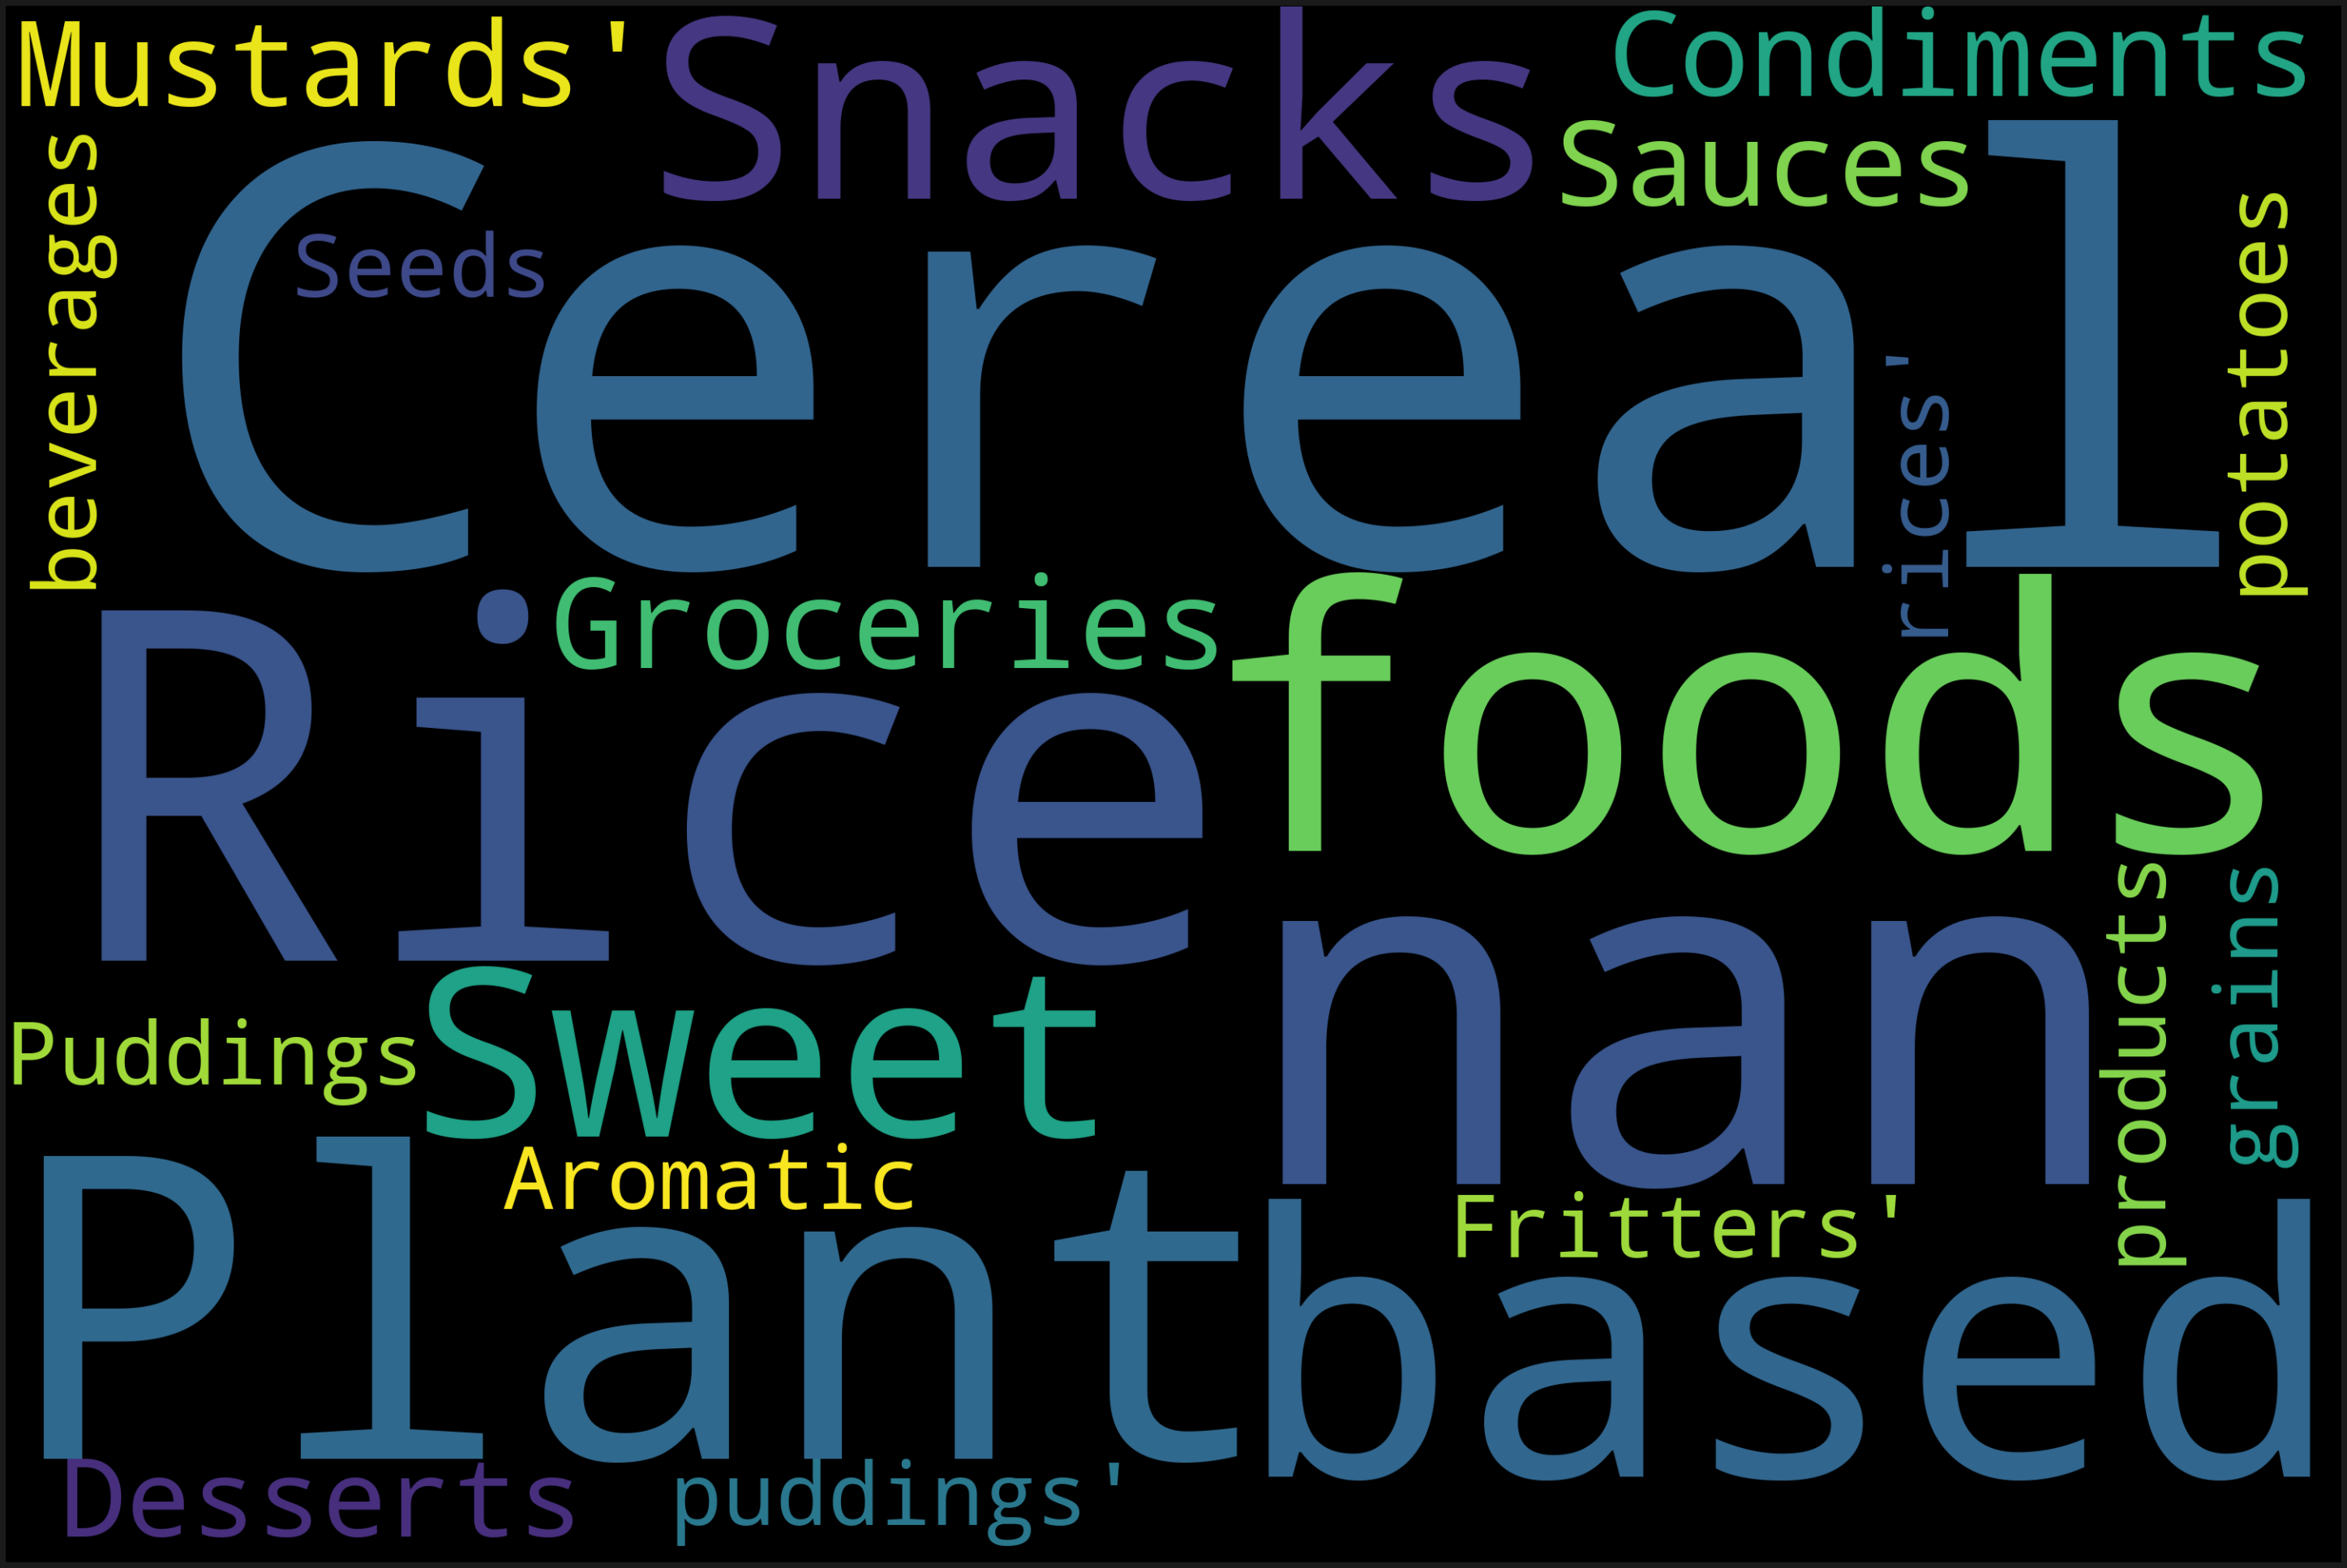

In [46]:
text = OFFDataChunkWithSelectedColumns['categories_en'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### 

In [47]:
categories_df['categories_en']= categories_df['categories_en'].str.partition(',')[0] 

In [48]:
categories_df['categories_en']
categories_df=categories_df.groupby('categories_en').size().reset_index(name='counts')
categories_df=categories_df.sort_values(by='counts',axis=0,ascending=False)


In [49]:
categories_df.head(50)

,categories_en,counts
145,Plant-based foods and beverages,7193
169,Snacks,3365
62,Dairies,2838
125,Meals,2313
127,Meats,2200
18,Beverages,1485
91,Frozen foods,1083
99,Groceries,725
34,Canned foods,683
67,Desserts,462


In [50]:
categories_df.describe()

,counts
count,2459.000000
mean,11.017487
std,187.128896
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,7193.000000


######  Limit the number of categories to the ones that have more than 13 records

In [51]:
restristed_categories_df=categories_df.loc[(categories_df['counts']>= 13)]

In [52]:
restristed_categories_df

,categories_en,counts
145,Plant-based foods and beverages,7193
169,Snacks,3365
62,Dairies,2838
125,Meals,2313
127,Meats,2200
18,Beverages,1485
91,Frozen foods,1083
99,Groceries,725
34,Canned foods,683
67,Desserts,462


In [53]:
OFFDataChunkWithSelectedColumns['categories_en']=OFFDataChunkWithSelectedColumns['categories_en'].str.partition(',')[0] 

In [54]:
OFFDataChunkWithSelectedColumns

,code,product_name,categories,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,alcohol_100g
0,0000000000017,Vitória crackers,NaN,NaN,France,NaN,NaN,375.000000,1569.0,3.08,15.0,0.0,7.8,1.40,0.560000,0.0,NaN,NaN,NaN,NaN,0.0
1,0000000000031,Cacao,NaN,NaN,France,NaN,NaN,NaN,NaN,0.00,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
3,0000000000100,moutarde au moût de raisin,"Epicerie,Condiments,Sauces,Moutardes",Groceries,France,18.0,d,NaN,NaN,2.20,22.0,0.0,5.1,4.60,1.811024,0.0,NaN,E160c - Paprika extract,0.0,0.0,0.0
5,0000000000123,Sauce Sweety chili 0%,NaN,NaN,France,NaN,NaN,21.032505,88.0,0.00,0.4,0.0,0.2,2.04,0.816000,0.0,NaN,NaN,NaN,NaN,0.0
6,0000000000178,Mini coco,NaN,NaN,France,NaN,NaN,59.990440,251.0,1.00,3.0,0.0,2.0,1.15,0.460000,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096548,9999990060556,Cailloux coeur chocolat,NaN,NaN,France,NaN,NaN,403.919694,1690.0,0.00,93.0,0.0,0.0,0.00,0.000000,0.0,NaN,NaN,NaN,NaN,0.0
1096550,9999990060631,Cailloux aux amandes,NaN,NaN,France,NaN,NaN,472.992352,1979.0,15.00,63.0,0.0,9.0,0.00,0.000000,0.0,NaN,NaN,NaN,NaN,0.0
1096552,9999991042711,Riz au lait,fr:Riz au lait,Desserts,France,7.0,c,150.095602,628.0,4.30,14.0,0.0,2.9,0.08,0.032000,0.0,NaN,NaN,NaN,NaN,0.0
1096555,9999991149090,Riz parfumé,"Aliments et boissons à base de végétaux, Alime...",Plant-based foods and beverages,France,0.0,b,351.099426,1469.0,0.00,0.0,0.0,7.0,0.00,0.000000,0.0,NaN,NaN,NaN,NaN,0.0


In [55]:
OFFDataChunkWithSelectedColumns=OFFDataChunkWithSelectedColumns.loc[OFFDataChunkWithSelectedColumns['categories_en'].isin(restristed_categories_df['categories_en'])]

In [56]:
OFFDataChunkWithSelectedColumns

,code,product_name,categories,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,alcohol_100g
3,0000000000100,moutarde au moût de raisin,"Epicerie,Condiments,Sauces,Moutardes",Groceries,France,18.0,d,NaN,NaN,2.2,22.0,0.0,5.1,4.60,1.811024,0.0,NaN,E160c - Paprika extract,0.0,0.0,0.0
12,0000000000949,Salade de carottes râpées,"Plats préparés, Légumes préparés, Carottes râp...",Meals,France,1.0,b,32.026769,134.0,0.1,3.9,0.0,0.9,0.42,0.168000,0.0,NaN,NaN,NaN,NaN,0.0
19,0000000001281,Tarte noix de coco,"Tartes, Tartes sucrées, Tartes à la noix de coco",Pies,France,14.0,d,380.975143,1594.0,15.5,21.9,4.4,4.6,0.10,0.040000,0.0,NaN,NaN,NaN,NaN,0.0
27,0000000001885,Compote de poire,"Aliments et boissons à base de végétaux, Alime...",Plant-based foods and beverages,France,-2.0,a,157.026769,657.0,0.0,27.0,3.6,0.6,0.00,0.000000,0.0,NaN,NaN,NaN,NaN,0.0
31,0000000002257,Salade de macedoine de légumes,"Plats préparés, Légumes préparés, Entrées, Ent...",Meals,France,1.0,b,142.925430,598.0,1.0,1.0,0.0,1.9,0.27,0.108000,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096526,99993306,Pizza thon cuite sur pierre,"Plats préparés,Pizzas tartes salées et quiches...",Meals,France,11.0,d,231.118547,967.0,3.5,5.5,0.0,10.0,1.23,0.492000,0.0,NaN,NaN,NaN,NaN,0.0
1096532,9999900002553,Chocolat de Couverture Noir,"Snacks, Snacks sucrés, Chocolats, Chocolats noirs",Snacks,France,22.0,e,583.891013,2443.0,28.2,26.9,0.0,7.6,0.03,0.012000,0.0,NaN,NaN,NaN,NaN,0.0
1096552,9999991042711,Riz au lait,fr:Riz au lait,Desserts,France,7.0,c,150.095602,628.0,4.3,14.0,0.0,2.9,0.08,0.032000,0.0,NaN,NaN,NaN,NaN,0.0
1096555,9999991149090,Riz parfumé,"Aliments et boissons à base de végétaux, Alime...",Plant-based foods and beverages,France,0.0,b,351.099426,1469.0,0.0,0.0,0.0,7.0,0.00,0.000000,0.0,NaN,NaN,NaN,NaN,0.0


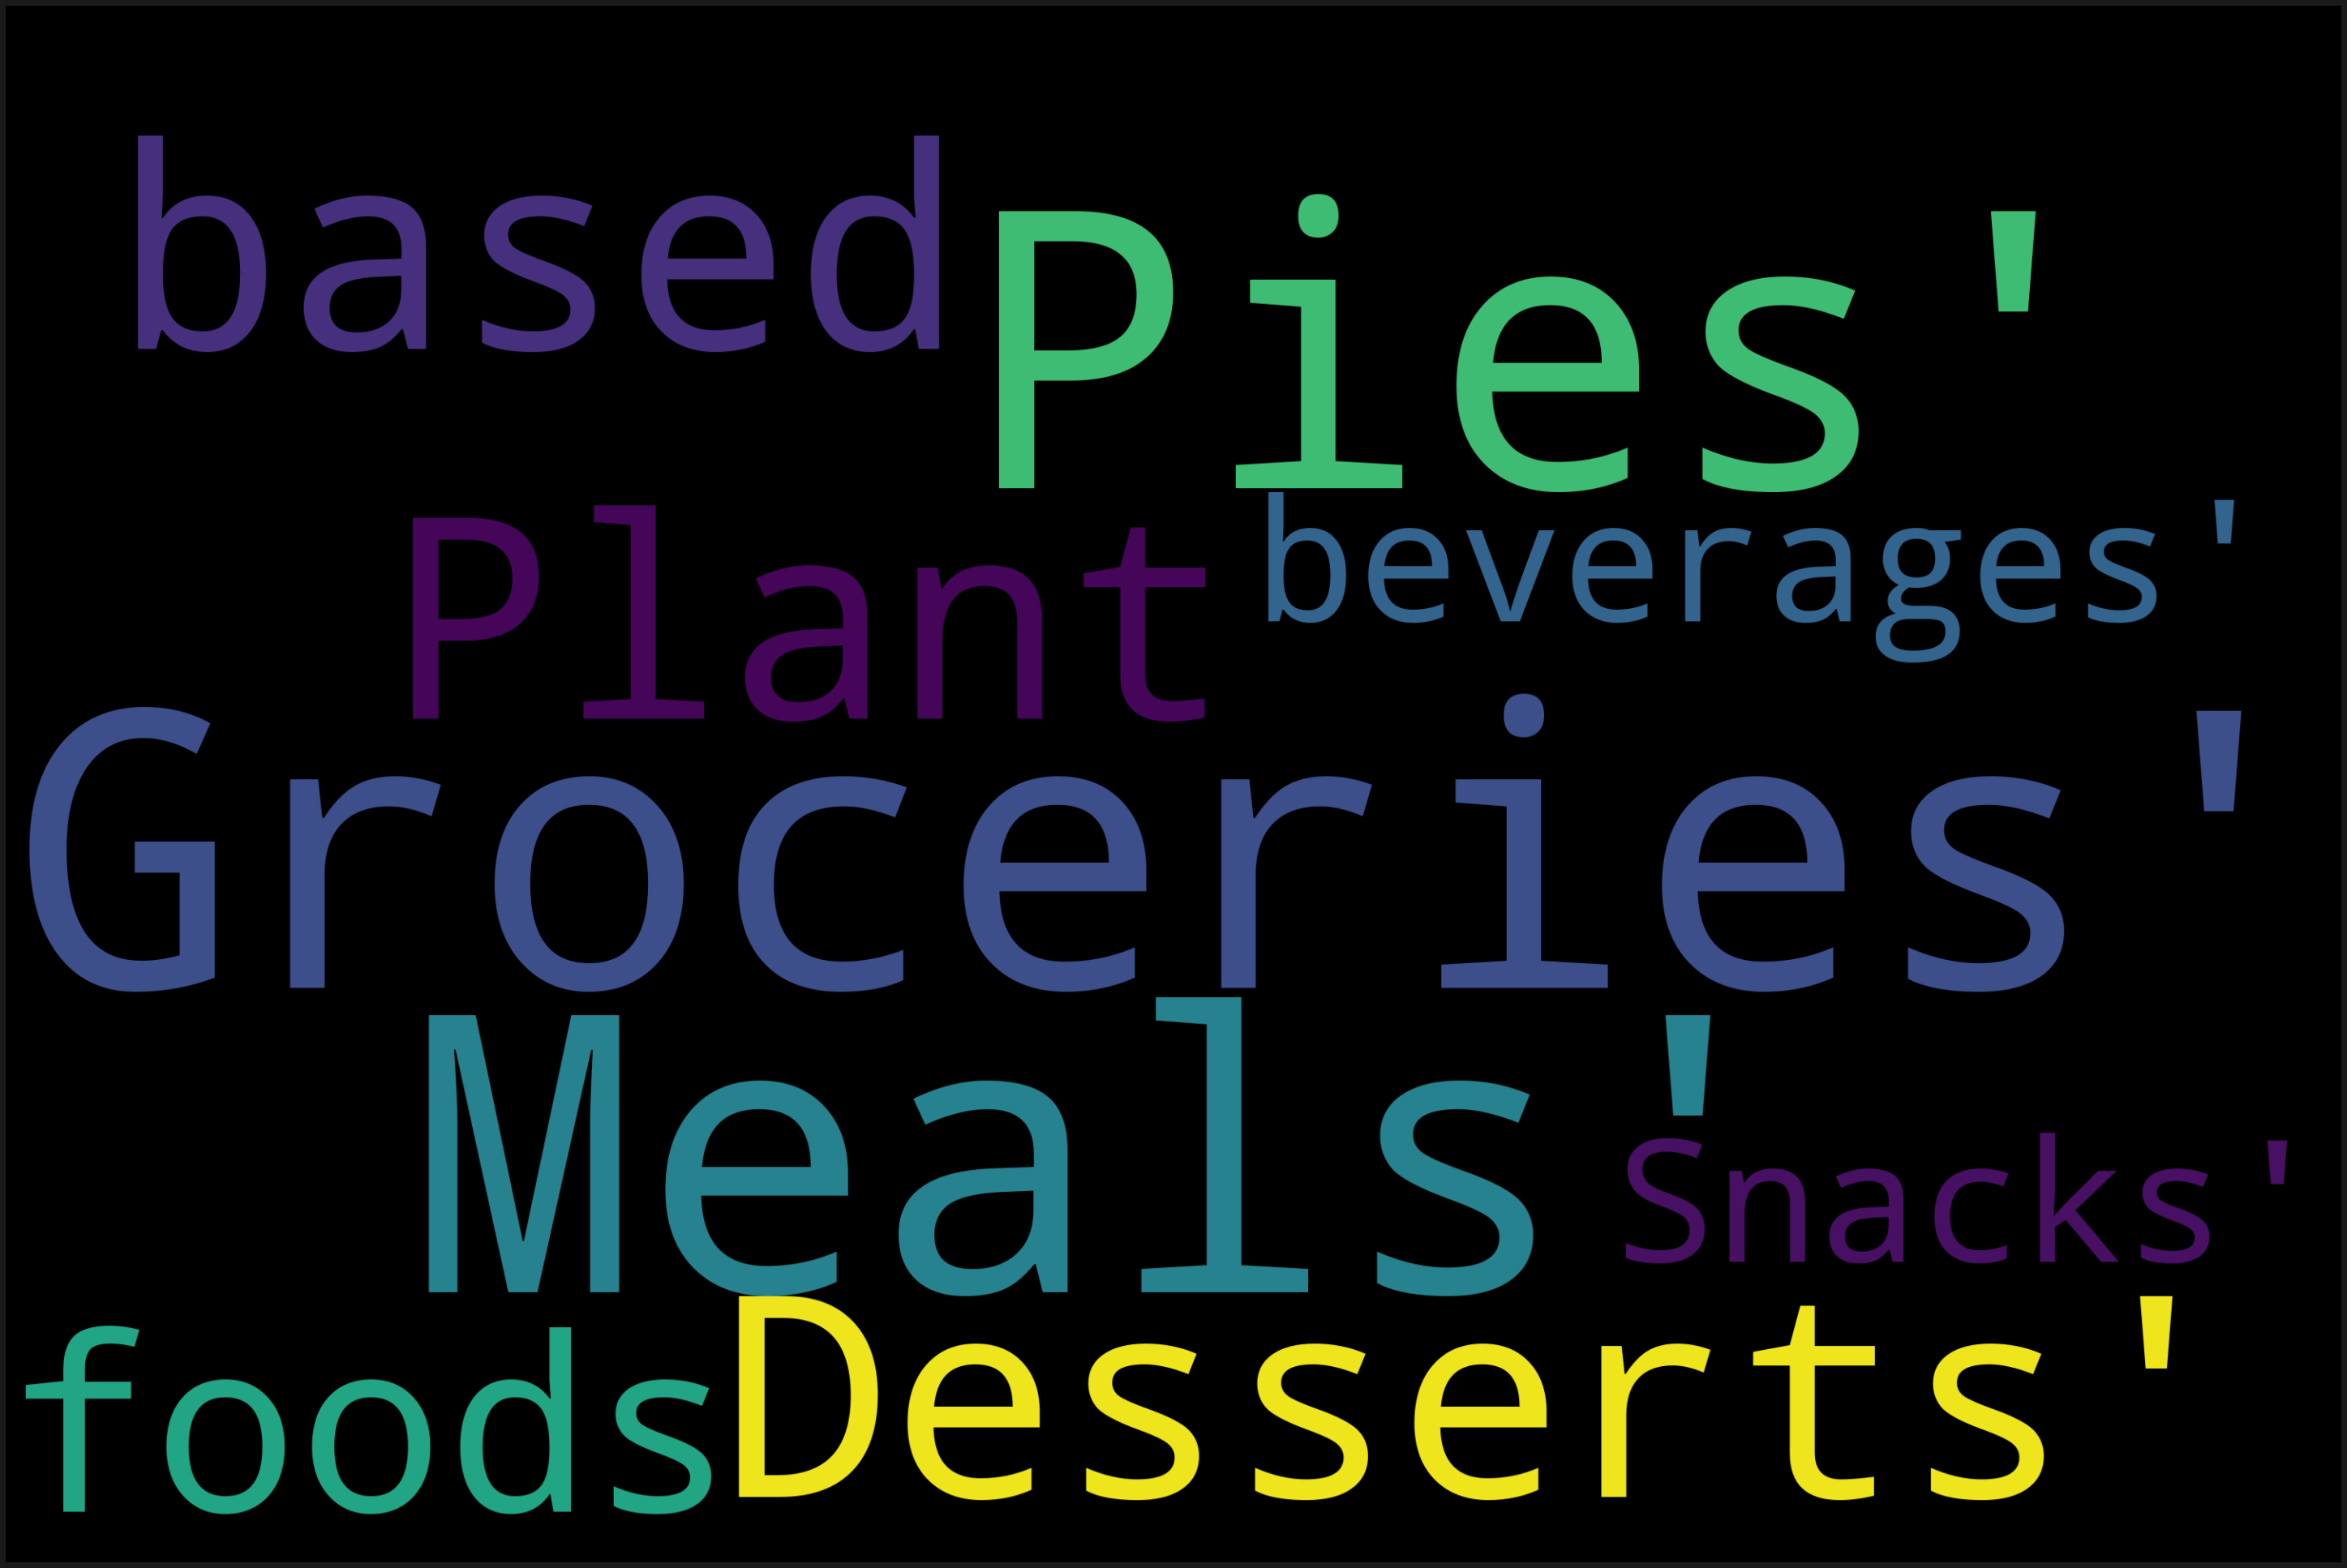

In [57]:
text = OFFDataChunkWithSelectedColumns['categories_en'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

###### Print the number of Nan in the Nutriscore column

In [58]:
print("Number of Nan in the Nutriscore column "+ str(OFFDataChunkWithSelectedColumns['nutriscore_score'].isna().sum()))

Number of Nan in the Nutriscore column 15084


###### Select the rows that have an empty Nutriscore

In [59]:
EmptyNutriscore=OFFDataChunkWithSelectedColumns.loc[OFFDataChunkWithSelectedColumns['nutriscore_score'].isna()]

In [60]:
EmptyNutriscore

,code,product_name,categories,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,alcohol_100g
145,0000000020114,Naturablue original,Compléments alimentaires,Dietary supplements,France,NaN,NaN,0.000000,0.0,0.00,0.00,0.0,0.0,NaN,NaN,0.0,NaN,E422 - Glycerol,0.0,0.0,0.0
342,0000002169385,Jus de Pomme,"Aliments et boissons à base de végétaux, Boiss...",Plant-based foods and beverages,France,NaN,NaN,42.065010,176.0,0.00,9.67,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
364,0000007730009,Biscuits sablés fourrage au cacao,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...",Snacks,France,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,NaN,NaN,0.0,"Nuts,Sesame seeds,Soybeans","E1400 - Dextrin,E322 - Lecithins,E503 - Ammoni...",0.0,1.0,0.0
379,0000010090206,Thé de Noël aromatisé orange-cannelle,"Aliments et boissons à base de végétaux, Boiss...",Plant-based foods and beverages,France,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,NaN,NaN,0.0,"Eggs,Gluten,Milk,Mustard,Nuts,Sesame seeds,Soy...",NaN,0.0,0.0,0.0
383,0000010127735,Sirops pour ganache macarons,"Sirops, Sirops pour ganache",Syrups,France,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,NaN,NaN,0.0,NaN,"E131 - Patent blue v,E171 - Titanium dioxide,E...",0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096218,9876754344551,Coffret de 10 Mini Cookies,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...",Snacks,France,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,NaN,NaN,0.0,NaN,"E422 - Glycerol,E471 - Mono- and diglycerides ...",0.0,1.0,0.0
1096301,99020118,pelardon,"Produits laitiers, Produits fermentés, Produit...",Dairies,France,NaN,NaN,298.040153,1247.0,18.00,0.00,0.0,19.0,1.0000,0.40000,0.0,NaN,NaN,0.0,0.0,0.0
1096483,99885434,raviolis pekinois surgelés,"Surgelés, Plats préparés, Plats à base de pâte...",Frozen foods,France,NaN,NaN,928.059273,3883.0,3.79,2.17,0.0,0.0,1.0414,0.41656,0.0,fr:crevette-celeri-oeuf-lait-sesame,"E150 - Caramel,E150c - Ammonia caramel,E202 - ...",0.0,0.0,0.0
1096497,9991111114117,Nectar d'abricot,"Beverages,Plant-based foods and beverages,Plan...",Plant-based foods and beverages,France,NaN,NaN,59.034417,247.0,0.00,12.00,0.0,0.4,NaN,NaN,50.0,NaN,NaN,NaN,NaN,0.0


In [61]:

BeveragesWithEmptyNutriscore_df=EmptyNutriscore.loc[EmptyNutriscore['categories_en'].str.contains('^.*beverage.*$', regex=True,case=False)]

In [62]:
BeveragesWithEmptyNutriscore_df

,code,product_name,categories,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,alcohol_100g
342,0000002169385,Jus de Pomme,"Aliments et boissons à base de végétaux, Boiss...",Plant-based foods and beverages,France,NaN,NaN,42.065010,176.0,0.0,9.67,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
379,0000010090206,Thé de Noël aromatisé orange-cannelle,"Aliments et boissons à base de végétaux, Boiss...",Plant-based foods and beverages,France,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,NaN,NaN,0.0,"Eggs,Gluten,Milk,Mustard,Nuts,Sesame seeds,Soy...",NaN,0.0,0.0,0.0
448,0000020004552,Côtes du Rhône Villages 2014,"Boissons, Boissons alcoolisées, Vins, Vins fra...",Beverages,France,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,13.0
608,0000069110122,Persil,"Aliments et boissons à base de végétaux, Alime...",Plant-based foods and beverages,France,NaN,NaN,173.040153,724.0,0.1,1.00,0.0,4.1,0.10000,0.040000,0.0,NaN,NaN,NaN,NaN,0.0
980,0000800000002,Épices à pain d'épices,Epices,Plant-based foods and beverages,France,NaN,NaN,346.080306,1448.0,0.7,35.00,0.0,4.3,0.10000,0.040000,0.0,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095832,9760548340457,LA POM',"Aliments et boissons à base de végétaux, Alime...",Plant-based foods and beverages,France,NaN,NaN,54.015296,226.0,0.0,0.00,2.5,0.3,0.00508,0.002032,0.0,NaN,E300 - Ascorbic acid,0.0,0.0,0.0
1095894,9780545789646,Blanche des îles,"Boissons, Boissons alcoolisées, Bières, Bières...",Beverages,France,NaN,NaN,NaN,NaN,0.0,6.20,0.0,0.0,0.00000,0.000000,0.0,fr:rien-du-tout,NaN,0.0,0.0,5.5
1096164,98152056,biscottes sans gluten,"Aliments et boissons à base de végétaux, Alime...",Plant-based foods and beverages,France,NaN,NaN,407.026769,1703.0,0.0,0.00,0.0,0.0,NaN,NaN,0.0,NaN,"E330 - Citric acid,E464 - Hydroxypropyl methyl...",0.0,1.0,0.0
1096497,9991111114117,Nectar d'abricot,"Beverages,Plant-based foods and beverages,Plan...",Plant-based foods and beverages,France,NaN,NaN,59.034417,247.0,0.0,12.00,0.0,0.4,NaN,NaN,50.0,NaN,NaN,NaN,NaN,0.0


###### Select the foods that are not beverages and not baby food because the formula to compute Nutriscore is different


In [63]:
FoodsWithEmptyNutriscore_df=EmptyNutriscore.loc[~(EmptyNutriscore['categories_en'].str.contains('^.*beverage.*$|^.*baby.*$', regex=True,case=False))]


In [64]:
FoodsWithEmptyNutriscore_df

,code,product_name,categories,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,alcohol_100g
145,0000000020114,Naturablue original,Compléments alimentaires,Dietary supplements,France,NaN,NaN,0.000000,0.0,0.00,0.00,0.0,0.00,NaN,NaN,0.0,NaN,E422 - Glycerol,0.0,0.0,0.0
364,0000007730009,Biscuits sablés fourrage au cacao,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...",Snacks,France,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.00,NaN,NaN,0.0,"Nuts,Sesame seeds,Soybeans","E1400 - Dextrin,E322 - Lecithins,E503 - Ammoni...",0.0,1.0,0.0
383,0000010127735,Sirops pour ganache macarons,"Sirops, Sirops pour ganache",Syrups,France,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.00,NaN,NaN,0.0,NaN,"E131 - Patent blue v,E171 - Titanium dioxide,E...",0.0,0.0,0.0
399,0000010203668,Colorant alimentaire,"Additifs alimentaires, Colorants alimentaires",Food additives,France,NaN,NaN,511.950287,2142.0,0.02,0.00,0.0,0.00,0.0000,0.00000,0.0,NaN,NaN,NaN,NaN,0.0
400,0000010205648,Colorant Alimentaire Rouge velours en spray,"Additifs alimentaires, Colorants alimentaires",Food additives,France,NaN,NaN,782.982792,3276.0,53.04,0.00,0.0,0.66,0.8500,0.34000,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094550,9555022303291,Mamee Chef Spicy Chicken Shiitake Instant Noodles,"Plats préparés, Produits déshydratés, Produits...",Meals,France,NaN,NaN,405.114723,1695.0,6.30,10.20,0.0,8.90,4.7800,1.91200,0.0,"Celery,Crustaceans,Fish,Gluten,Milk,Molluscs,M...","E452 - Polyphosphates,E452i - Sodium polyphosp...",1.0,0.0,0.0
1096144,98,Cassoulet du pays occitan aux saucisses de tou...,"Snacks,Snacks sucrés,Biscuits et gâteaux,Biscuits",Snacks,France,NaN,NaN,580.066922,2427.0,9.90,37.00,0.0,0.00,0.0002,0.00008,0.0,NaN,"E150c - Ammonia caramel,E211 - Sodium benzoate...",0.0,0.0,0.0
1096218,9876754344551,Coffret de 10 Mini Cookies,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...",Snacks,France,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.00,NaN,NaN,0.0,NaN,"E422 - Glycerol,E471 - Mono- and diglycerides ...",0.0,1.0,0.0
1096301,99020118,pelardon,"Produits laitiers, Produits fermentés, Produit...",Dairies,France,NaN,NaN,298.040153,1247.0,18.00,0.00,0.0,19.00,1.0000,0.40000,0.0,NaN,NaN,0.0,0.0,0.0


In [65]:
FoodsWithEmptyNutriscoreButDataAvailable_df=FoodsWithEmptyNutriscore_df[~FoodsWithEmptyNutriscore_df['energy-kj_100g'].isna() & ~FoodsWithEmptyNutriscore_df['saturated-fat_100g'].isna() & ~FoodsWithEmptyNutriscore_df['sugars_100g'].isna() & ~FoodsWithEmptyNutriscore_df['sodium_100g'].isna() & ~FoodsWithEmptyNutriscore_df['fruits-vegetables-nuts_100g'].isna()& ~FoodsWithEmptyNutriscore_df['fiber_100g'].isna()& ~FoodsWithEmptyNutriscore_df['proteins_100g'].isna()]

In [66]:
FoodsWithEmptyNutriscoreButDataAvailable_df

,code,product_name,categories,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,alcohol_100g
399,0000010203668,Colorant alimentaire,"Additifs alimentaires, Colorants alimentaires",Food additives,France,NaN,NaN,511.950287,2142.0,0.02,0.00,0.0,0.00,0.0000,0.00000,0.0,NaN,NaN,NaN,NaN,0.0
400,0000010205648,Colorant Alimentaire Rouge velours en spray,"Additifs alimentaires, Colorants alimentaires",Food additives,France,NaN,NaN,782.982792,3276.0,53.04,0.00,0.0,0.66,0.8500,0.34000,0.0,NaN,NaN,NaN,NaN,0.0
402,0000010205679,Colorant alimentaire bleu velours en spray,"Additifs alimentaires, Colorants alimentaires",Food additives,France,NaN,NaN,719.885277,3012.0,48.96,0.00,0.0,0.00,0.2500,0.10000,0.0,"Milk,Soybeans",E171 - Titanium dioxide,0.0,0.0,0.0
834,0000606009841,Beignets framboises,Beignets sucrés,Snacks,France,NaN,NaN,304.015296,1272.0,1.70,12.70,0.0,5.80,0.7000,0.28000,0.0,NaN,NaN,NaN,NaN,0.0
1160,00014120,Vinaigre de cidre marin,"Vinaigres,Vinaigres de cidre",Vinegars,France,NaN,NaN,0.956023,4.0,0.01,0.01,0.0,0.01,0.0100,0.00400,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093747,9421023620845,Miel De Manuka MGO 250+ - 250G - Manuka Health,"Petit-déjeuners, Produits à tartiner, Produits...",Spreads,France,NaN,NaN,329.110899,1377.0,0.00,82.10,0.0,0.30,0.0250,0.01000,0.0,NaN,NaN,0.0,0.0,0.0
1094550,9555022303291,Mamee Chef Spicy Chicken Shiitake Instant Noodles,"Plats préparés, Produits déshydratés, Produits...",Meals,France,NaN,NaN,405.114723,1695.0,6.30,10.20,0.0,8.90,4.7800,1.91200,0.0,"Celery,Crustaceans,Fish,Gluten,Milk,Molluscs,M...","E452 - Polyphosphates,E452i - Sodium polyphosp...",1.0,0.0,0.0
1096144,98,Cassoulet du pays occitan aux saucisses de tou...,"Snacks,Snacks sucrés,Biscuits et gâteaux,Biscuits",Snacks,France,NaN,NaN,580.066922,2427.0,9.90,37.00,0.0,0.00,0.0002,0.00008,0.0,NaN,"E150c - Ammonia caramel,E211 - Sodium benzoate...",0.0,0.0,0.0
1096301,99020118,pelardon,"Produits laitiers, Produits fermentés, Produit...",Dairies,France,NaN,NaN,298.040153,1247.0,18.00,0.00,0.0,19.00,1.0000,0.40000,0.0,NaN,NaN,0.0,0.0,0.0


In [67]:
data = {'energy-kj_100g':[0,335,670,1005,1340,1675,2010,2345,2680,3015,3350],'sugars_100g':[0,4.5,9,13.5,18,22.5,27,31,36,40,45],'saturated-fat_100g':[0,1,2,3,4,5,6,7,8,9,10],'sodium_100g':[0,90,180,270,360,450,540,630,720,810,900]} 
nutriment_df= pd.DataFrame(data)
nutriment_p=[0,1,2,3,4,5,6,7,8,9,10]
data = {'fruits-vegetables-nuts_100g':[0,40,60,60,60,80],'fiber_100g':[0,0.9,1.9,2.8,3.7,4.7],'proteins_100g':[0,1.6,3.2,4.8,6.4,8.0]} 
element_df= pd.DataFrame(data)
element_p=[0,1,2,2,2,5]



In [68]:
nutriment_df

,energy-kj_100g,sugars_100g,saturated-fat_100g,sodium_100g
0,0,0.0,0,0
1,335,4.5,1,90
2,670,9.0,2,180
3,1005,13.5,3,270
4,1340,18.0,4,360
5,1675,22.5,5,450
6,2010,27.0,6,540
7,2345,31.0,7,630
8,2680,36.0,8,720
9,3015,40.0,9,810


In [69]:
element_df

,fruits-vegetables-nuts_100g,fiber_100g,proteins_100g
0,0,0.0,0.0
1,40,0.9,1.6
2,60,1.9,3.2
3,60,2.8,4.8
4,60,3.7,6.4
5,80,4.7,8.0


In [70]:
FoodsWithEmptyNutriscoreButDataAvailable_df.head(5)

,code,product_name,categories,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,alcohol_100g
399,0000010203668,Colorant alimentaire,"Additifs alimentaires, Colorants alimentaires",Food additives,France,NaN,NaN,511.950287,2142.0,0.02,0.00,0.0,0.00,0.00,0.000,0.0,NaN,NaN,NaN,NaN,0.0
400,0000010205648,Colorant Alimentaire Rouge velours en spray,"Additifs alimentaires, Colorants alimentaires",Food additives,France,NaN,NaN,782.982792,3276.0,53.04,0.00,0.0,0.66,0.85,0.340,0.0,NaN,NaN,NaN,NaN,0.0
402,0000010205679,Colorant alimentaire bleu velours en spray,"Additifs alimentaires, Colorants alimentaires",Food additives,France,NaN,NaN,719.885277,3012.0,48.96,0.00,0.0,0.00,0.25,0.100,0.0,"Milk,Soybeans",E171 - Titanium dioxide,0.0,0.0,0.0
834,0000606009841,Beignets framboises,Beignets sucrés,Snacks,France,NaN,NaN,304.015296,1272.0,1.70,12.70,0.0,5.80,0.70,0.280,0.0,NaN,NaN,NaN,NaN,0.0
1160,00014120,Vinaigre de cidre marin,"Vinaigres,Vinaigres de cidre",Vinegars,France,NaN,NaN,0.956023,4.0,0.01,0.01,0.0,0.01,0.01,0.004,0.0,NaN,NaN,NaN,NaN,0.0


In [71]:
FoodsWithEmptyNutriscoreButDataAvailable_df


scores=[]
for index,row in FoodsWithEmptyNutriscoreButDataAvailable_df.iterrows(): 
    score=0
    for col in nutriment_df.columns: 
        i = 0
        while row[col]>(nutriment_df[col][i]):
            i = i+1
            if i>=len(nutriment_df):
                i=len(nutriment_df)-1
                break
                  
        if i==0:
             pass
        else:
            i=i-1
        score=score+i
        #print("Col "+ str(col)+" Rows "+str(row[col])+" Score "+str(i))
    #print("Product Name "+ str(row['product_name'])+" Score "+str(score))
    scores.append(score)

#print(str(scores))
FoodsWithEmptyNutriscoreButDataAvailable_df.assign(negative=scores)

,code,product_name,categories,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,alcohol_100g,negative
399,0000010203668,Colorant alimentaire,"Additifs alimentaires, Colorants alimentaires",Food additives,France,NaN,NaN,511.950287,2142.0,0.02,0.00,0.0,0.00,0.0000,0.00000,0.0,NaN,NaN,NaN,NaN,0.0,1
400,0000010205648,Colorant Alimentaire Rouge velours en spray,"Additifs alimentaires, Colorants alimentaires",Food additives,France,NaN,NaN,782.982792,3276.0,53.04,0.00,0.0,0.66,0.8500,0.34000,0.0,NaN,NaN,NaN,NaN,0.0,11
402,0000010205679,Colorant alimentaire bleu velours en spray,"Additifs alimentaires, Colorants alimentaires",Food additives,France,NaN,NaN,719.885277,3012.0,48.96,0.00,0.0,0.00,0.2500,0.10000,0.0,"Milk,Soybeans",E171 - Titanium dioxide,0.0,0.0,0.0,11
834,0000606009841,Beignets framboises,Beignets sucrés,Snacks,France,NaN,NaN,304.015296,1272.0,1.70,12.70,0.0,5.80,0.7000,0.28000,0.0,NaN,NaN,NaN,NaN,0.0,3
1160,00014120,Vinaigre de cidre marin,"Vinaigres,Vinaigres de cidre",Vinegars,France,NaN,NaN,0.956023,4.0,0.01,0.01,0.0,0.01,0.0100,0.00400,0.0,NaN,NaN,NaN,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093747,9421023620845,Miel De Manuka MGO 250+ - 250G - Manuka Health,"Petit-déjeuners, Produits à tartiner, Produits...",Spreads,France,NaN,NaN,329.110899,1377.0,0.00,82.10,0.0,0.30,0.0250,0.01000,0.0,NaN,NaN,0.0,0.0,0.0,9
1094550,9555022303291,Mamee Chef Spicy Chicken Shiitake Instant Noodles,"Plats préparés, Produits déshydratés, Produits...",Meals,France,NaN,NaN,405.114723,1695.0,6.30,10.20,0.0,8.90,4.7800,1.91200,0.0,"Celery,Crustaceans,Fish,Gluten,Milk,Molluscs,M...","E452 - Polyphosphates,E452i - Sodium polyphosp...",1.0,0.0,0.0,9
1096144,98,Cassoulet du pays occitan aux saucisses de tou...,"Snacks,Snacks sucrés,Biscuits et gâteaux,Biscuits",Snacks,France,NaN,NaN,580.066922,2427.0,9.90,37.00,0.0,0.00,0.0002,0.00008,0.0,NaN,"E150c - Ammonia caramel,E211 - Sodium benzoate...",0.0,0.0,0.0,18
1096301,99020118,pelardon,"Produits laitiers, Produits fermentés, Produit...",Dairies,France,NaN,NaN,298.040153,1247.0,18.00,0.00,0.0,19.00,1.0000,0.40000,0.0,NaN,NaN,0.0,0.0,0.0,9


In [72]:
def computeScore(InputToScore_df,Table_df,points):
    scores=[]
    for index,row in InputToScore_df.iterrows(): 
        score=0
        for col in Table_df.columns: 
            i = 0
            while row[col]>(Table_df[col][i]):
                i = i+1
                if i>=len(Table_df):
                    i=len(Table_df)-1
                    break
                  
            if i==0:
                 pass
            else:
                i=i-1
            #score=score+i
            score=score+points[i]
            #print("Col "+ str(col)+" Rows "+str(row[col])+" Score "+str(i))
        #print("Product Name "+ str(row['product_name'])+" Score "+str(score))
        scores.append(score)
    return scores;
nutriments=computeScore(FoodsWithEmptyNutriscoreButDataAvailable_df,nutriment_df,nutriment_p)
elements=computeScore(FoodsWithEmptyNutriscoreButDataAvailable_df,element_df,element_p)
FoodsWithEmptyNutriscoreButDataAvailable_df=FoodsWithEmptyNutriscoreButDataAvailable_df.assign(nutriments=nutriments)
FoodsWithEmptyNutriscoreButDataAvailable_df=FoodsWithEmptyNutriscoreButDataAvailable_df.assign(elements=elements)
FoodsWithEmptyNutriscoreButDataAvailable_df['ComputedScore']=FoodsWithEmptyNutriscoreButDataAvailable_df['nutriments']-FoodsWithEmptyNutriscoreButDataAvailable_df['elements']

In [73]:
FoodsWithEmptyNutriscoreButDataAvailable_df

,code,product_name,categories,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,alcohol_100g,nutriments,elements,ComputedScore
399,0000010203668,Colorant alimentaire,"Additifs alimentaires, Colorants alimentaires",Food additives,France,NaN,NaN,511.950287,2142.0,0.02,0.00,0.0,0.00,0.0000,0.00000,0.0,NaN,NaN,NaN,NaN,0.0,1,0,1
400,0000010205648,Colorant Alimentaire Rouge velours en spray,"Additifs alimentaires, Colorants alimentaires",Food additives,France,NaN,NaN,782.982792,3276.0,53.04,0.00,0.0,0.66,0.8500,0.34000,0.0,NaN,NaN,NaN,NaN,0.0,11,0,11
402,0000010205679,Colorant alimentaire bleu velours en spray,"Additifs alimentaires, Colorants alimentaires",Food additives,France,NaN,NaN,719.885277,3012.0,48.96,0.00,0.0,0.00,0.2500,0.10000,0.0,"Milk,Soybeans",E171 - Titanium dioxide,0.0,0.0,0.0,11,0,11
834,0000606009841,Beignets framboises,Beignets sucrés,Snacks,France,NaN,NaN,304.015296,1272.0,1.70,12.70,0.0,5.80,0.7000,0.28000,0.0,NaN,NaN,NaN,NaN,0.0,3,2,1
1160,00014120,Vinaigre de cidre marin,"Vinaigres,Vinaigres de cidre",Vinegars,France,NaN,NaN,0.956023,4.0,0.01,0.01,0.0,0.01,0.0100,0.00400,0.0,NaN,NaN,NaN,NaN,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093747,9421023620845,Miel De Manuka MGO 250+ - 250G - Manuka Health,"Petit-déjeuners, Produits à tartiner, Produits...",Spreads,France,NaN,NaN,329.110899,1377.0,0.00,82.10,0.0,0.30,0.0250,0.01000,0.0,NaN,NaN,0.0,0.0,0.0,9,0,9
1094550,9555022303291,Mamee Chef Spicy Chicken Shiitake Instant Noodles,"Plats préparés, Produits déshydratés, Produits...",Meals,France,NaN,NaN,405.114723,1695.0,6.30,10.20,0.0,8.90,4.7800,1.91200,0.0,"Celery,Crustaceans,Fish,Gluten,Milk,Molluscs,M...","E452 - Polyphosphates,E452i - Sodium polyphosp...",1.0,0.0,0.0,9,2,7
1096144,98,Cassoulet du pays occitan aux saucisses de tou...,"Snacks,Snacks sucrés,Biscuits et gâteaux,Biscuits",Snacks,France,NaN,NaN,580.066922,2427.0,9.90,37.00,0.0,0.00,0.0002,0.00008,0.0,NaN,"E150c - Ammonia caramel,E211 - Sodium benzoate...",0.0,0.0,0.0,18,0,18
1096301,99020118,pelardon,"Produits laitiers, Produits fermentés, Produit...",Dairies,France,NaN,NaN,298.040153,1247.0,18.00,0.00,0.0,19.00,1.0000,0.40000,0.0,NaN,NaN,0.0,0.0,0.0,9,2,7


Beverages

In [74]:
#data = {'energy-kj_100g':[0,0,30,60,90,120,150,180,210,240,270],'sugars_100g':[0,0,1.5,3,4.5,6,7.5,9,10.5,12,13.5],'saturated-fat_100g':[0,1,2,3,4,5,6,7,8,9,10],'sodium_100g':[0,90,180,270,360,450,540,630,720,810,900]} 
#nutriment_df= pd.DataFrame(data)
#nutriment_p=[0,1,2,3,4,5,6,7,8,9,10]
#data = {'fruits-vegetables-nuts_100g':[0,0,40,40,60,60,60,60,60,60,80],'fiber_100g':[0,0.9,1.9,2.8,3.7,4.7],'proteins_100g':[0,1.6,3.2,4.8,6.4,8.0]} 
#element_df= pd.DataFrame(data)
#element_p=[0,1,2,2,2,5]

In [75]:
len(nutriment_df)

11

In [76]:
OFFDataChunkWithSelectedColumns

,code,product_name,categories,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,alcohol_100g
3,0000000000100,moutarde au moût de raisin,"Epicerie,Condiments,Sauces,Moutardes",Groceries,France,18.0,d,NaN,NaN,2.2,22.0,0.0,5.1,4.60,1.811024,0.0,NaN,E160c - Paprika extract,0.0,0.0,0.0
12,0000000000949,Salade de carottes râpées,"Plats préparés, Légumes préparés, Carottes râp...",Meals,France,1.0,b,32.026769,134.0,0.1,3.9,0.0,0.9,0.42,0.168000,0.0,NaN,NaN,NaN,NaN,0.0
19,0000000001281,Tarte noix de coco,"Tartes, Tartes sucrées, Tartes à la noix de coco",Pies,France,14.0,d,380.975143,1594.0,15.5,21.9,4.4,4.6,0.10,0.040000,0.0,NaN,NaN,NaN,NaN,0.0
27,0000000001885,Compote de poire,"Aliments et boissons à base de végétaux, Alime...",Plant-based foods and beverages,France,-2.0,a,157.026769,657.0,0.0,27.0,3.6,0.6,0.00,0.000000,0.0,NaN,NaN,NaN,NaN,0.0
31,0000000002257,Salade de macedoine de légumes,"Plats préparés, Légumes préparés, Entrées, Ent...",Meals,France,1.0,b,142.925430,598.0,1.0,1.0,0.0,1.9,0.27,0.108000,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096526,99993306,Pizza thon cuite sur pierre,"Plats préparés,Pizzas tartes salées et quiches...",Meals,France,11.0,d,231.118547,967.0,3.5,5.5,0.0,10.0,1.23,0.492000,0.0,NaN,NaN,NaN,NaN,0.0
1096532,9999900002553,Chocolat de Couverture Noir,"Snacks, Snacks sucrés, Chocolats, Chocolats noirs",Snacks,France,22.0,e,583.891013,2443.0,28.2,26.9,0.0,7.6,0.03,0.012000,0.0,NaN,NaN,NaN,NaN,0.0
1096552,9999991042711,Riz au lait,fr:Riz au lait,Desserts,France,7.0,c,150.095602,628.0,4.3,14.0,0.0,2.9,0.08,0.032000,0.0,NaN,NaN,NaN,NaN,0.0
1096555,9999991149090,Riz parfumé,"Aliments et boissons à base de végétaux, Alime...",Plant-based foods and beverages,France,0.0,b,351.099426,1469.0,0.0,0.0,0.0,7.0,0.00,0.000000,0.0,NaN,NaN,NaN,NaN,0.0


In [77]:
FoodsWithEmptyNutriscoreButDataAvailable_df
OFFDataChunkWithSelectedColumns
SmartData=pd.concat([FoodsWithEmptyNutriscoreButDataAvailable_df,OFFDataChunkWithSelectedColumns],sort=False)

In [78]:
SmartData

,code,product_name,categories,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kj_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,traces_en,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,alcohol_100g,nutriments,elements,ComputedScore
399,0000010203668,Colorant alimentaire,"Additifs alimentaires, Colorants alimentaires",Food additives,France,NaN,NaN,511.950287,2142.0,0.02,0.00,0.0,0.00,0.00,0.000,0.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
400,0000010205648,Colorant Alimentaire Rouge velours en spray,"Additifs alimentaires, Colorants alimentaires",Food additives,France,NaN,NaN,782.982792,3276.0,53.04,0.00,0.0,0.66,0.85,0.340,0.0,NaN,NaN,NaN,NaN,0.0,11.0,0.0,11.0
402,0000010205679,Colorant alimentaire bleu velours en spray,"Additifs alimentaires, Colorants alimentaires",Food additives,France,NaN,NaN,719.885277,3012.0,48.96,0.00,0.0,0.00,0.25,0.100,0.0,"Milk,Soybeans",E171 - Titanium dioxide,0.0,0.0,0.0,11.0,0.0,11.0
834,0000606009841,Beignets framboises,Beignets sucrés,Snacks,France,NaN,NaN,304.015296,1272.0,1.70,12.70,0.0,5.80,0.70,0.280,0.0,NaN,NaN,NaN,NaN,0.0,3.0,2.0,1.0
1160,00014120,Vinaigre de cidre marin,"Vinaigres,Vinaigres de cidre",Vinegars,France,NaN,NaN,0.956023,4.0,0.01,0.01,0.0,0.01,0.01,0.004,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096526,99993306,Pizza thon cuite sur pierre,"Plats préparés,Pizzas tartes salées et quiches...",Meals,France,11.0,d,231.118547,967.0,3.50,5.50,0.0,10.00,1.23,0.492,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1096532,9999900002553,Chocolat de Couverture Noir,"Snacks, Snacks sucrés, Chocolats, Chocolats noirs",Snacks,France,22.0,e,583.891013,2443.0,28.20,26.90,0.0,7.60,0.03,0.012,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1096552,9999991042711,Riz au lait,fr:Riz au lait,Desserts,France,7.0,c,150.095602,628.0,4.30,14.00,0.0,2.90,0.08,0.032,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1096555,9999991149090,Riz parfumé,"Aliments et boissons à base de végétaux, Alime...",Plant-based foods and beverages,France,0.0,b,351.099426,1469.0,0.00,0.00,0.0,7.00,0.00,0.000,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


###### Remove the products where there is no nutriscore and where we were not able to compute it

In [79]:
SmartData=SmartData.loc[~((SmartData['nutriscore_score'].isna()) & (SmartData['ComputedScore'].isna()))]

In [83]:
###### Merge both the nutriscore provided by openfood and the nutriscore computed from the relevant data

In [84]:
SmartData['aggregated_nutriscore'] =SmartData['nutriscore_score'].add(SmartData['ComputedScore'], fill_value=0)

###### Display the number of values by columns

Number of values in each column for the selected data 
 count        16.000000
mean     130190.500000
std       36251.287622
min       38734.000000
25%      114925.750000
50%      152080.000000
75%      153628.000000
max      153628.000000
dtype: float64


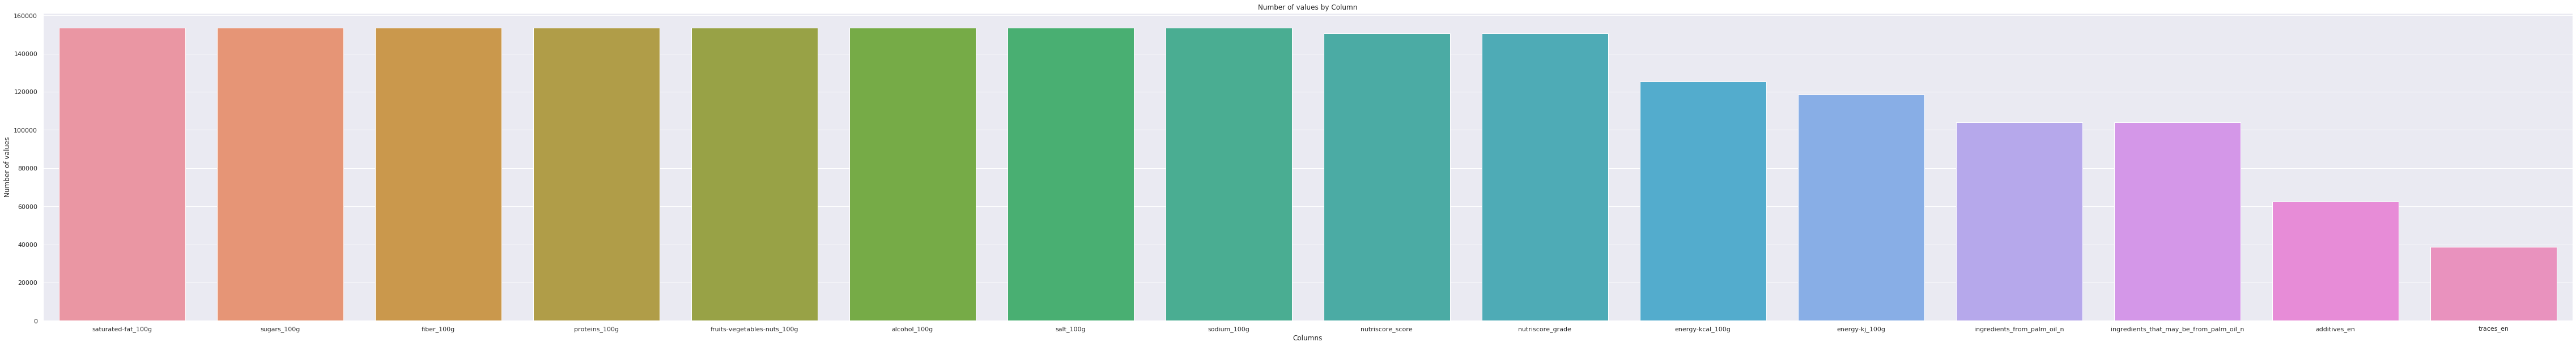

In [85]:
number_of_nan_by_column_selected_data=SmartData.loc[:,data_columns].count()
print("Number of values in each column for the selected data \n "+str(number_of_nan_by_column_selected_data.describe()))

data_columns_series=pd.Series(data_columns,index=data_columns)
number_of_nan_by_column_df=pd.DataFrame({ 'Columns':data_columns_series,'Nan': number_of_nan_by_column_selected_data },index=data_columns_series)
number_of_nan_by_column_df=number_of_nan_by_column_df.sort_values(by=['Nan'], ascending=False).reset_index()
sns.set(color_codes=True)
plt.figure(figsize=(80,10))
ax=sns.barplot(x='Columns',y='Nan', data=number_of_nan_by_column_df)
ax.set_title('Number of values by Column')
ax.set_xlabel('Columns')
ax.set_ylabel('Number of values')
ax.figure.savefig("./numberofvaluesbycolumnsmartdata.png")

plt.show()

###### Save the dataframe into a CSV file

In [86]:
#Save the Dataframe in a CSV file
SmartData.to_csv('./SmartDatatest.csv', sep=',',header=True,quoting=csv.QUOTE_ALL, columns=SmartData.columns.tolist(), index=False) 
